# Exploratory data analysis
## Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('auto.csv', index_col=0)
df.head()

,manufacturer,main_type,built_year,first_registration_date,has_all_wheel_drive,horsepower,handover_key_count,length,width,height,mileage,kw,price,evaluation_datetime,fuel,gear,ac,gps,color
0,Audi,1er,2006_year,2006-08-14,NaN,108.0,2,3594.0,2039.0,1501,306389.0,80.0,1302,2018-06-29 16:22:31,Benzin,Manual,Manual,NaN,red
1,BMW,206,2009_year,2009-06-24,NaN,59.0,2,3736.0,2159.0,1462,183210.0,43.0,3153,2018-06-01 13:30:40,Benzin,Manual,Manual,NaN,black
2,Audi,1er,2002_year,2002-12-27,NaN,168.0,2,3452.0,2333.0,1486,203049.0,124.0,1793,2018-05-26 15:14:39,Benzin,Manual,Auto,NaN,brown
3,Citroen,207,2003_year,2003-02-07,NaN,218.0,2,3495.0,2150.0,1445,344348.0,161.0,3261,2018-06-23 16:48:08,Diesel,Auto_or_Hybrid,Auto,Big,silver
4,Dacia,307,2004_year,2005-02-25,NaN,69.0,2,3586.0,2163.0,1451,242488.0,51.0,805,2018-09-02 15:13:29,Benzin,Manual,Manual,NaN,brown


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 19 columns):
manufacturer               2121 non-null object
main_type                  2121 non-null object
built_year                 2121 non-null object
first_registration_date    2121 non-null object
has_all_wheel_drive        314 non-null float64
horsepower                 2118 non-null float64
handover_key_count         2121 non-null int64
length                     2116 non-null float64
width                      2117 non-null float64
height                     2121 non-null int64
mileage                    2115 non-null float64
kw                         2117 non-null float64
price                      2121 non-null int64
evaluation_datetime        2121 non-null object
fuel                       2117 non-null object
gear                       2121 non-null object
ac                         2065 non-null object
gps                        883 non-null object
color                      2

In [4]:
df.drop(columns=["has_all_wheel_drive"], inplace=True)

In [5]:
df.dtypes

manufacturer                object
main_type                   object
built_year                  object
first_registration_date     object
horsepower                 float64
handover_key_count           int64
length                     float64
width                      float64
height                       int64
mileage                    float64
kw                         float64
price                        int64
evaluation_datetime         object
fuel                        object
gear                        object
ac                          object
gps                         object
color                       object
dtype: object

In [6]:
df.groupby(["manufacturer"]).size()

manufacturer
??                 3
Audi             136
BMW              363
Citroen          303
Dacia            125
Fiat             210
Ford              26
Honda             55
Hyundai           47
Kia              175
Land Rover       265
MINI              11
Mazda             13
Mercedes-Benz     19
Nissan            32
Opel              58
Peugeot           24
Porsche           36
Renault           14
Seat              65
Skoda             28
Smart             11
Suzuki            41
Toyota            37
Volkswagen        13
Volvo             11
dtype: int64

In [7]:
df.applymap(lambda x: x == '??').sum()

manufacturer               3
main_type                  3
built_year                 3
first_registration_date    2
horsepower                 0
handover_key_count         0
length                     0
width                      0
height                     0
mileage                    0
kw                         0
price                      0
evaluation_datetime        3
fuel                       2
gear                       1
ac                         4
gps                        2
color                      1
dtype: int64

In [8]:
df = df[(df[['manufacturer','main_type','built_year',
                'first_registration_date','evaluation_datetime',
                'fuel','gear','ac','gps','color']] != '??').all(axis=1)]


In [9]:
df["evaluation_datetime"]=pd.to_datetime(df['evaluation_datetime'], errors='coerce')

### built_year

In [10]:
df["built_year"]=df["built_year"].str.partition("_")[0].astype('int')

In [11]:
df.head()

,manufacturer,main_type,built_year,first_registration_date,horsepower,handover_key_count,length,width,height,mileage,kw,price,evaluation_datetime,fuel,gear,ac,gps,color
0,Audi,1er,2006,2006-08-14,108.0,2,3594.0,2039.0,1501,306389.0,80.0,1302,2018-06-29 16:22:31,Benzin,Manual,Manual,NaN,red
1,BMW,206,2009,2009-06-24,59.0,2,3736.0,2159.0,1462,183210.0,43.0,3153,2018-06-01 13:30:40,Benzin,Manual,Manual,NaN,black
2,Audi,1er,2002,2002-12-27,168.0,2,3452.0,2333.0,1486,203049.0,124.0,1793,2018-05-26 15:14:39,Benzin,Manual,Auto,NaN,brown
3,Citroen,207,2003,2003-02-07,218.0,2,3495.0,2150.0,1445,344348.0,161.0,3261,2018-06-23 16:48:08,Diesel,Auto_or_Hybrid,Auto,Big,silver
4,Dacia,307,2004,2005-02-25,69.0,2,3586.0,2163.0,1451,242488.0,51.0,805,2018-09-02 15:13:29,Benzin,Manual,Manual,NaN,brown


### first_registration_date

In [12]:
df["first_registration_date"]=pd.to_datetime(df['first_registration_date'], errors='coerce')
df = df.dropna(subset=['first_registration_date'])


In [13]:
df.describe()

,built_year,horsepower,handover_key_count,length,width,height,mileage,kw,price
count,2096.000000,2093.000000,2096.000000,2091.000000,2092.000000,2096.000000,2090.000000,2092.000000,2096.000000
mean,2008.079676,144.835643,1.895038,3728.099474,2144.272945,1510.836832,146699.201435,106.563576,6716.763359
std,3.766812,56.097018,0.362245,204.466255,153.108469,129.728728,76524.739685,41.245718,6185.581578
min,1998.000000,37.000000,1.000000,3374.000000,1458.000000,0.000000,2888.000000,28.000000,50.000000
25%,2005.000000,106.000000,2.000000,3586.000000,2037.000000,1440.000000,90051.750000,78.000000,2507.250000
50%,2008.000000,136.000000,2.000000,3698.000000,2150.000000,1480.000000,137955.500000,100.000000,4940.500000
75%,2011.000000,172.000000,2.000000,3829.000000,2255.000000,1545.000000,193268.500000,126.000000,8838.000000
max,2017.000000,469.000000,4.000000,5377.000000,2467.000000,1990.000000,707712.000000,345.000000,53030.000000


In [14]:
df[df["height"]==0]

,manufacturer,main_type,built_year,first_registration_date,horsepower,handover_key_count,length,width,height,mileage,kw,price,evaluation_datetime,fuel,gear,ac,gps,color
485,Dacia,307,2006,2007-05-11,88.0,2,3684.0,2122.0,0,170567.0,65.0,1769,2018-08-06 10:01:18,Benzin,Manual,Manual,NaN,brown
548,BMW,Touareg,2005,2005-04-28,154.0,2,3858.0,2128.0,0,239662.0,113.0,6353,2018-07-23 16:58:48,Diesel,Manual,Auto,Big,red
1834,BMW,Touareg,2003,2003-07-21,166.0,2,3673.0,1977.0,0,250602.0,121.0,6888,2018-07-12 17:09:44,Diesel,Manual,Auto,Big,brown
1937,BMW,Touareg,2003,2003-10-23,165.0,2,3572.0,2010.0,0,317416.0,121.0,5188,2018-07-28 11:45:07,Diesel,Manual,Auto,NaN,brown


In [15]:
df = df[df.height != 0]

## EDA

###  How price is distributed over the car manufacturer ?

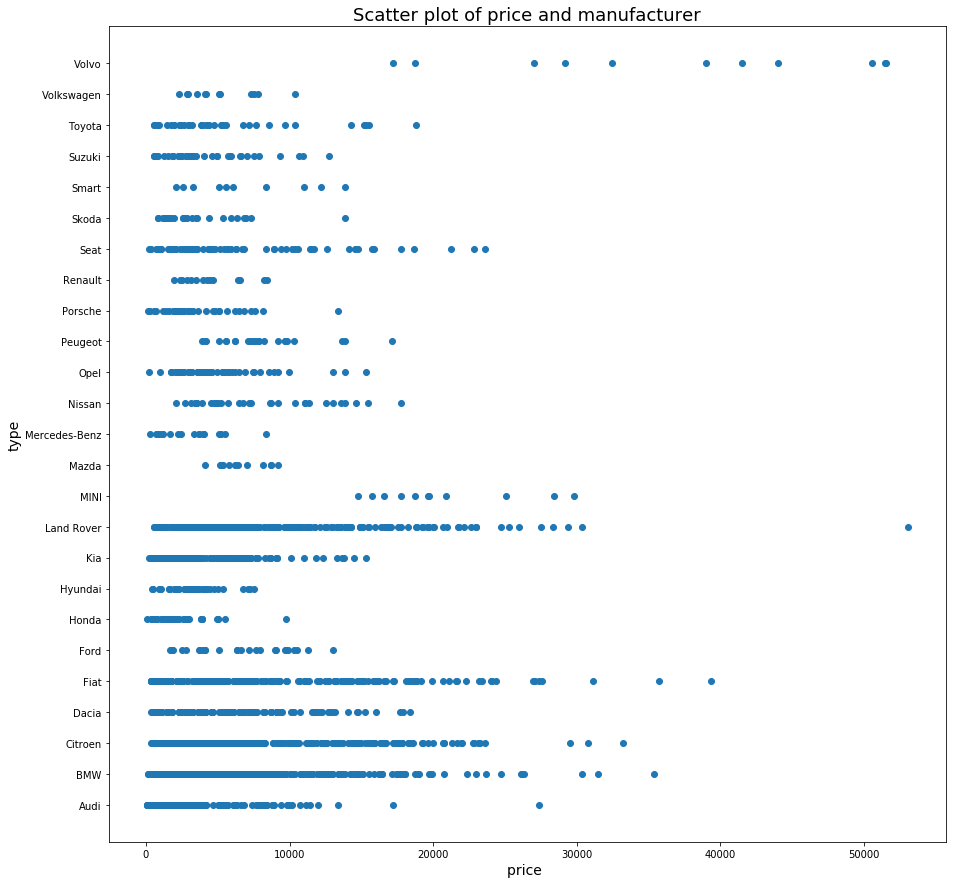

In [16]:
# here we set the figure size to 15x15
plt.figure(figsize=(15, 15))
# plot two values price per type
#sns.stripplot(data = df, x='price', y='main_type', jitter=.1)
plt.scatter(df.price, df['manufacturer'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("type", fontsize=14)
plt.title("Scatter plot of price and manufacturer",fontsize=18)
plt.show()

### How price is distributed over the Built Year ? 

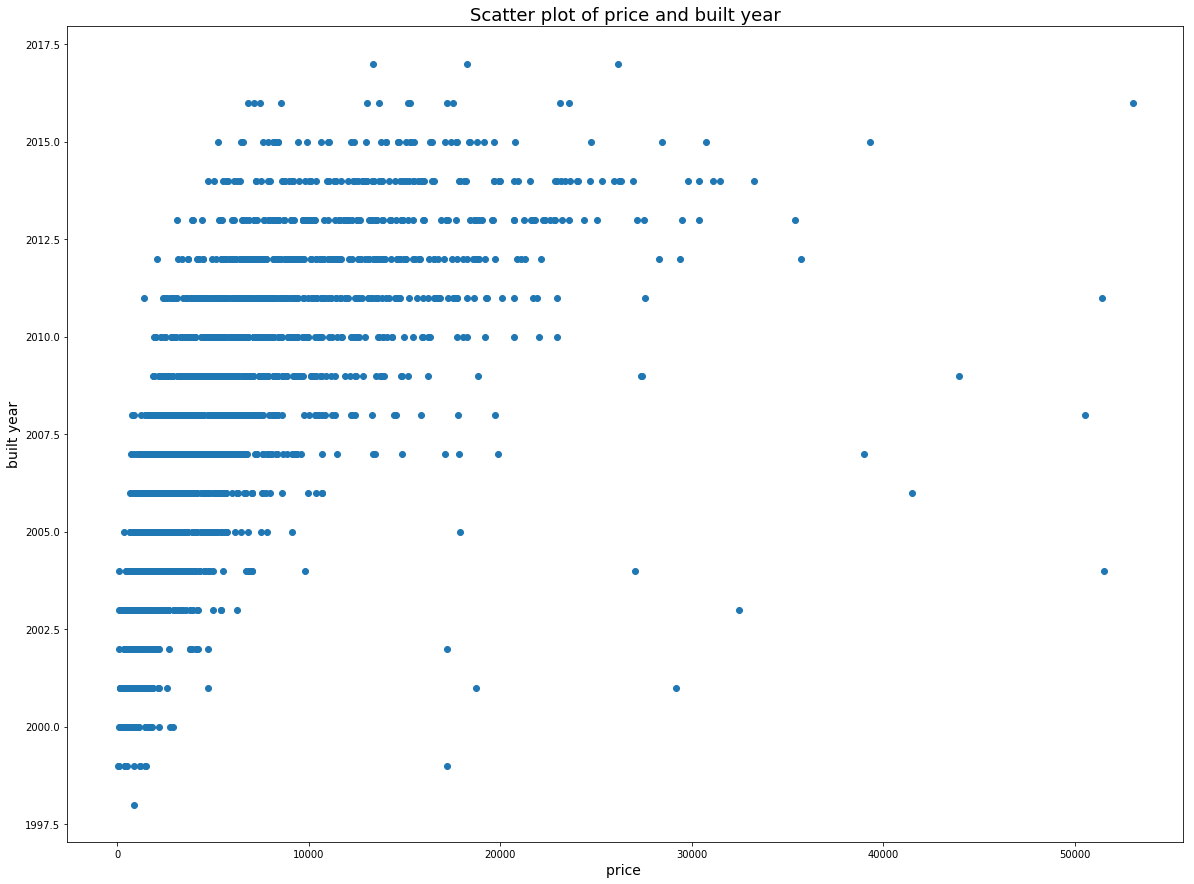

In [17]:
# here we set the figure size to 20x15
plt.figure(figsize=(20, 15))
# plot two values price per built year
plt.scatter(df.price, df['built_year'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("built year", fontsize=14)
plt.title("Scatter plot of price and built year",fontsize=18)
plt.show()

/media/emna/datapartition/classifiers/facesDB/celeb/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


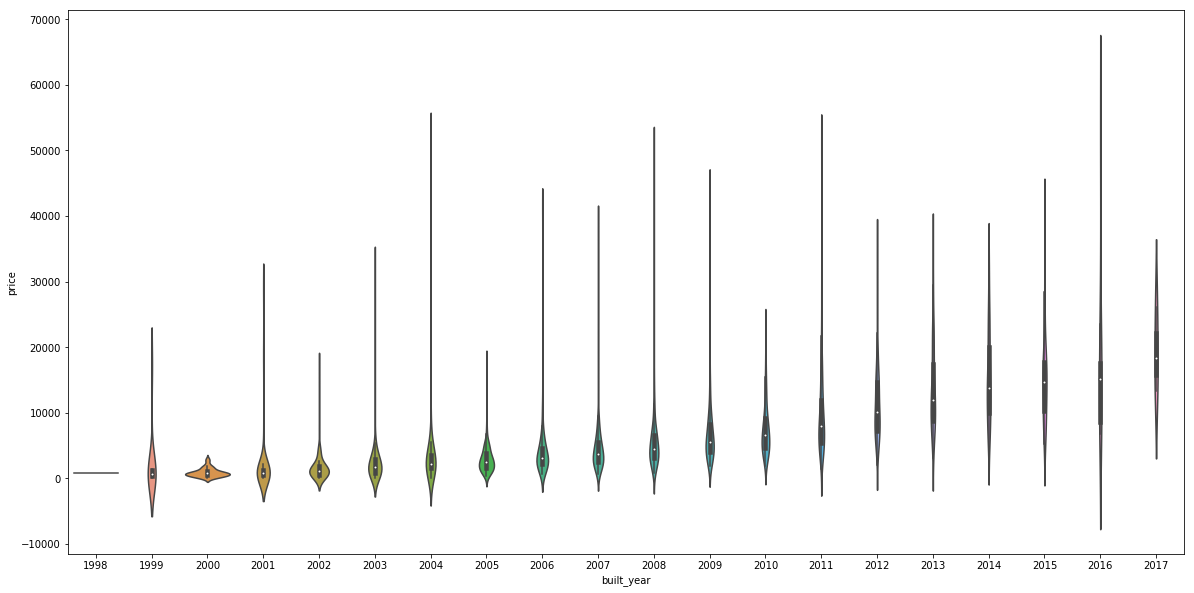

In [18]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = df, x='built_year', y='price')
plt.show()

### How price is distributed over the first registration date

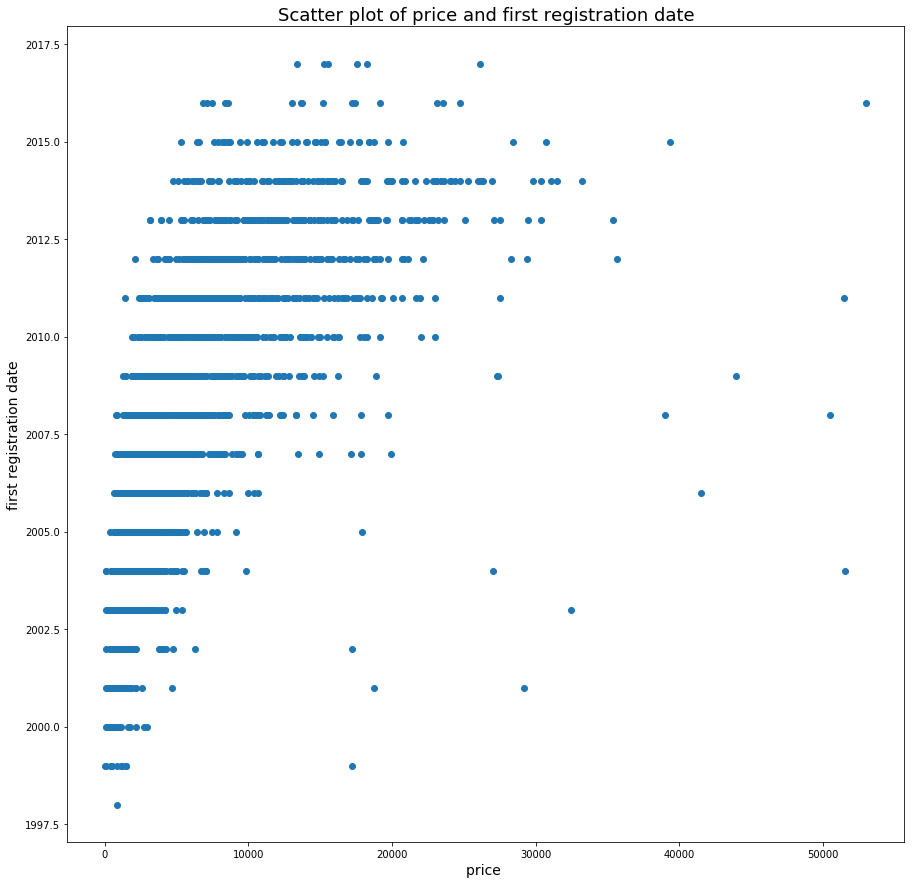

In [19]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 15))
# plot two values price per first reg date
plt.scatter(df.price, df['first_registration_date'].dt.year)
plt.xlabel("price ", fontsize=14)
plt.ylabel("first registration date", fontsize=14)
plt.title("Scatter plot of price and first registration date",fontsize=18)
plt.show()

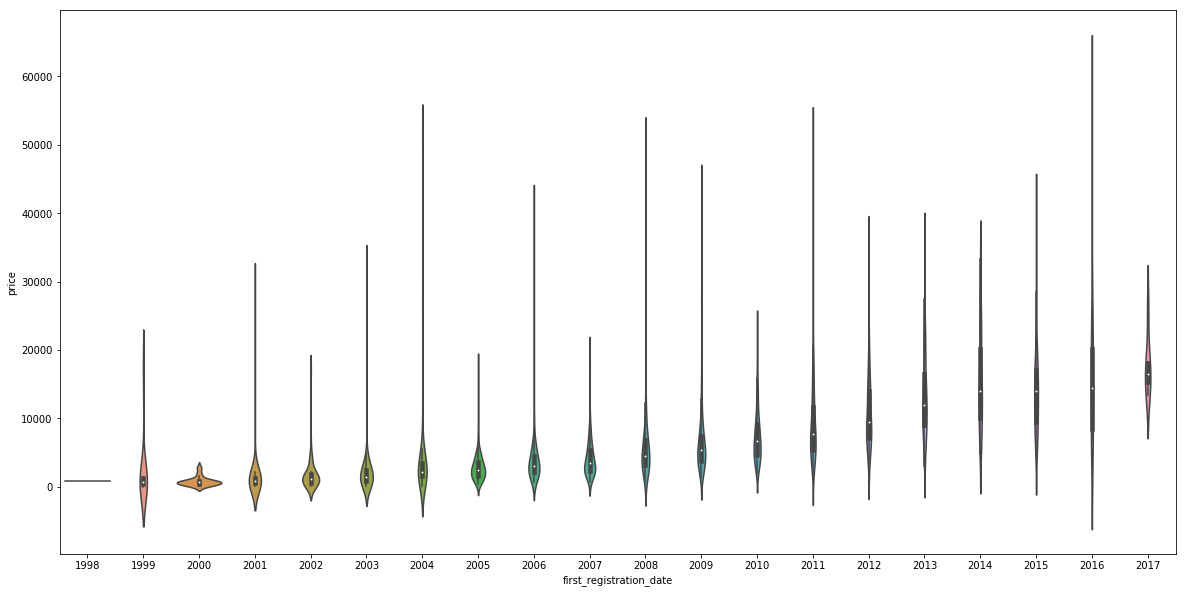

In [20]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = df, x=df['first_registration_date'].dt.year, y='price')
plt.show()

### How price is distributed over the HorsePower

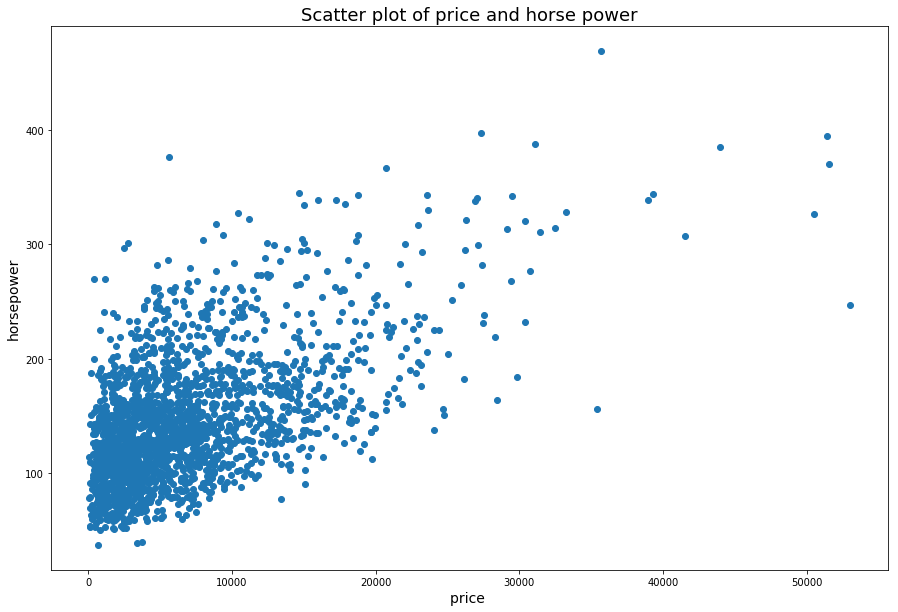

In [21]:
# here we set the figure size to 15x10
plt.figure(figsize=(15, 10))
# plot two values price per horsepower
plt.scatter(df.price, df['horsepower'])
#sns.stripplot(data = df, x='price', y='horsepower', jitter=.5)
plt.xlabel("price ", fontsize=14)
plt.ylabel("horsepower", fontsize=14)
plt.title("Scatter plot of price and horse power",fontsize=18)
plt.show()

### How price is distributed over the handover key count

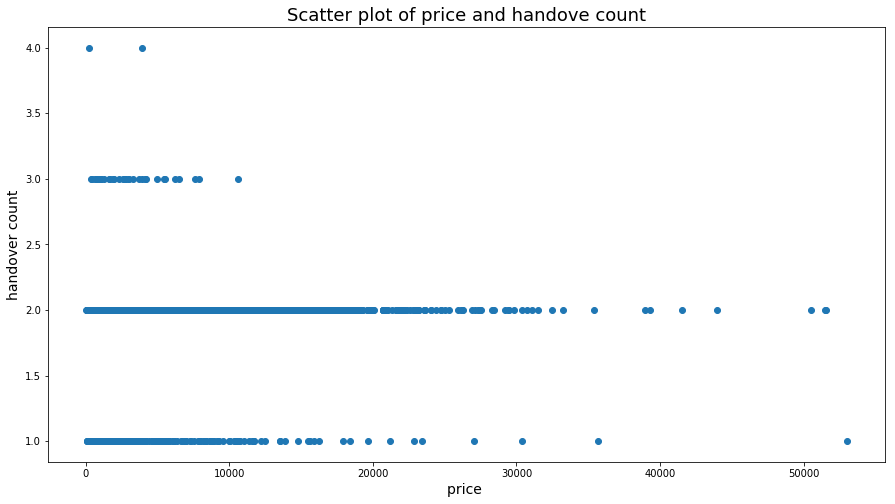

In [22]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 8))
# plot two values price per handover key
plt.scatter(df.price, df['handover_key_count'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("handover count", fontsize=14)
plt.title("Scatter plot of price and handove count",fontsize=18)
plt.show()


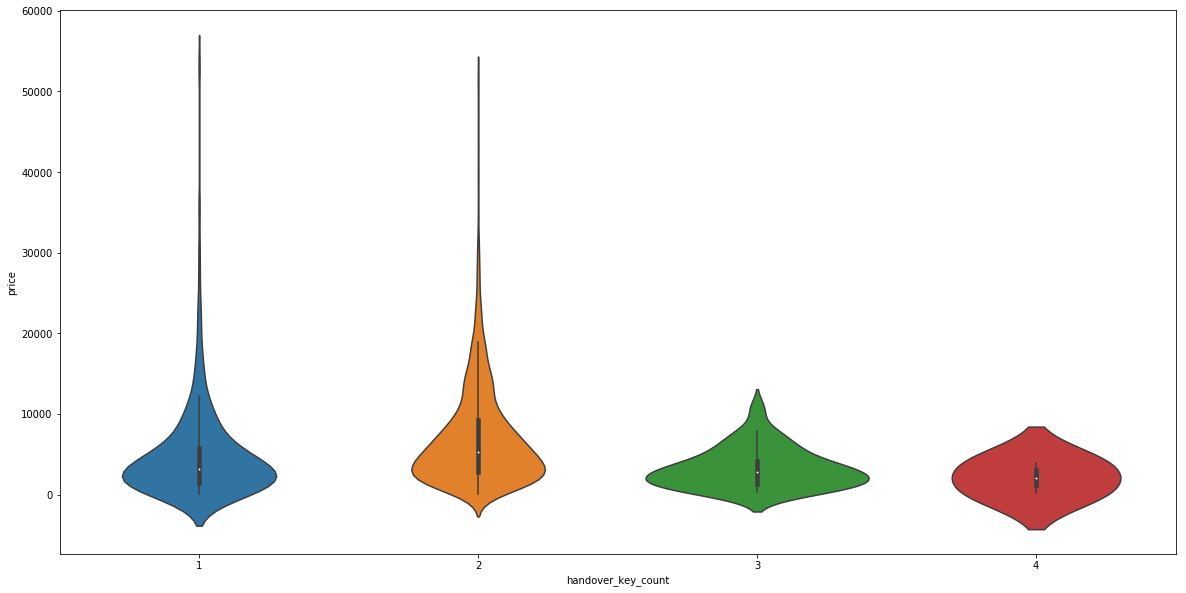

In [23]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = df, x=df['handover_key_count'], y='price')
plt.show()

### How price is distributed over the mileage?

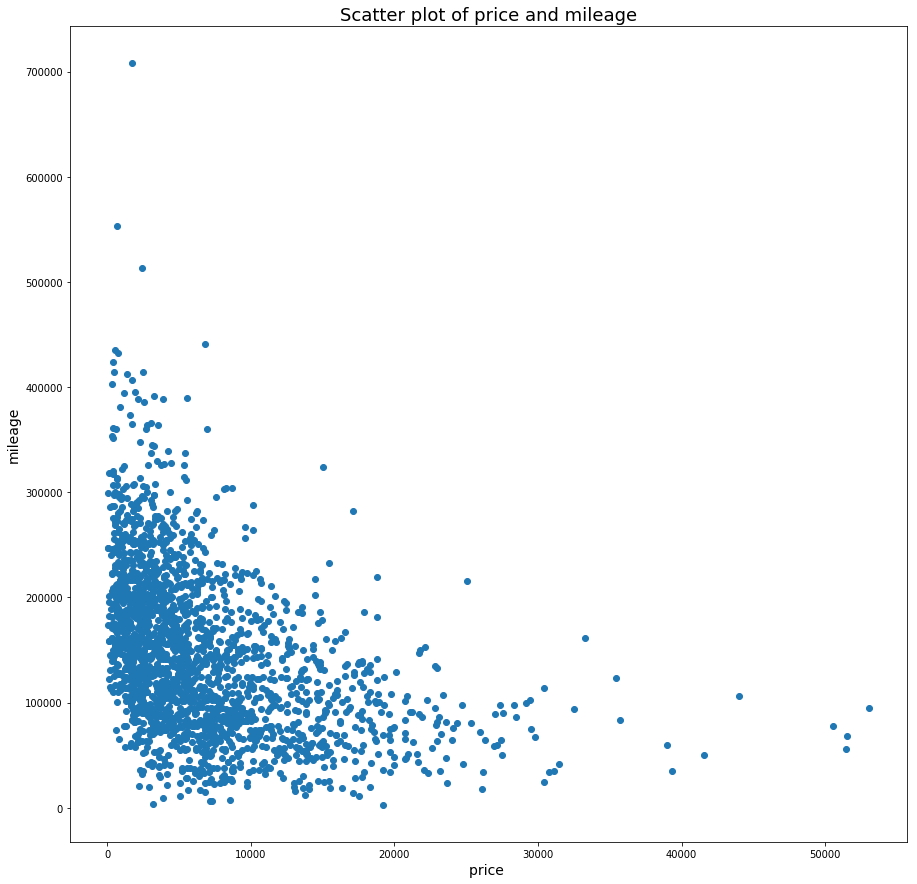

In [24]:

# here we set the figure size to 15x8
plt.figure(figsize=(15, 15))
# plot two values price per mileage
plt.scatter(df.price, df['mileage'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("mileage", fontsize=14)
plt.title("Scatter plot of price and mileage",fontsize=18)
plt.show()


### How price is distributed over the Engine Power?

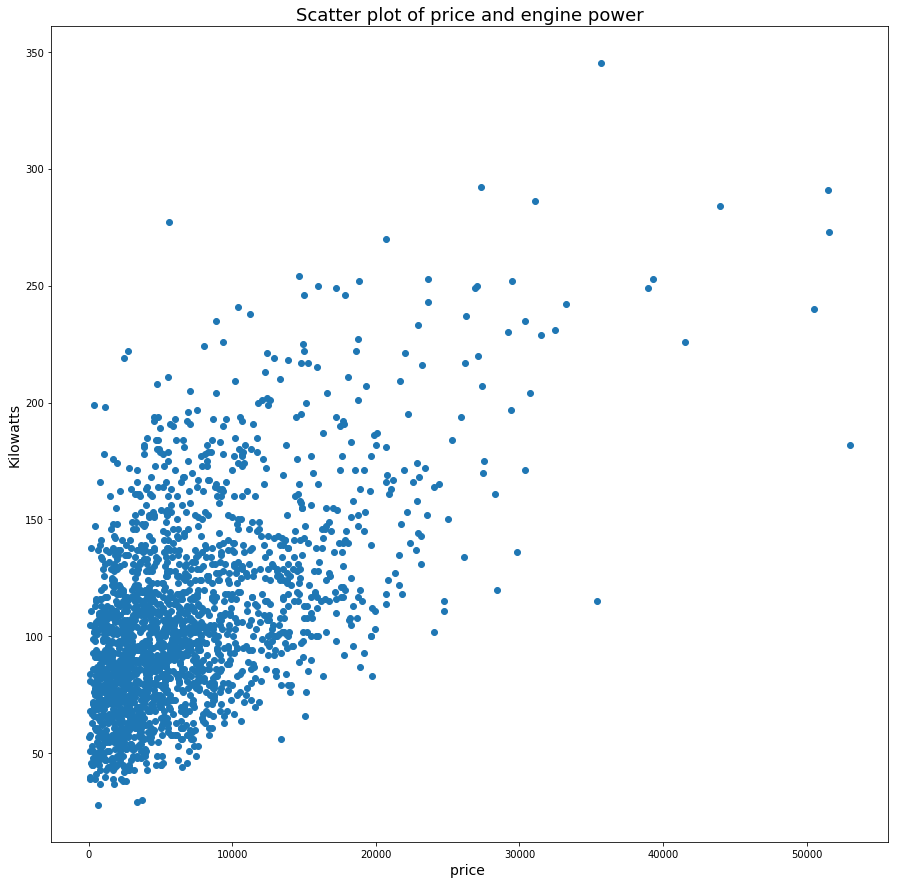

In [25]:
# here we set the figure size to 15x15
plt.figure(figsize=(15, 15))
# plot two values price per engine power
plt.scatter(df.price, df['kw'])
plt.xlabel("price ", fontsize=14)
plt.ylabel("Kilowatts", fontsize=14)
plt.title("Scatter plot of price and engine power",fontsize=18)
plt.show()


### How price is distributed over the Fuel Type?

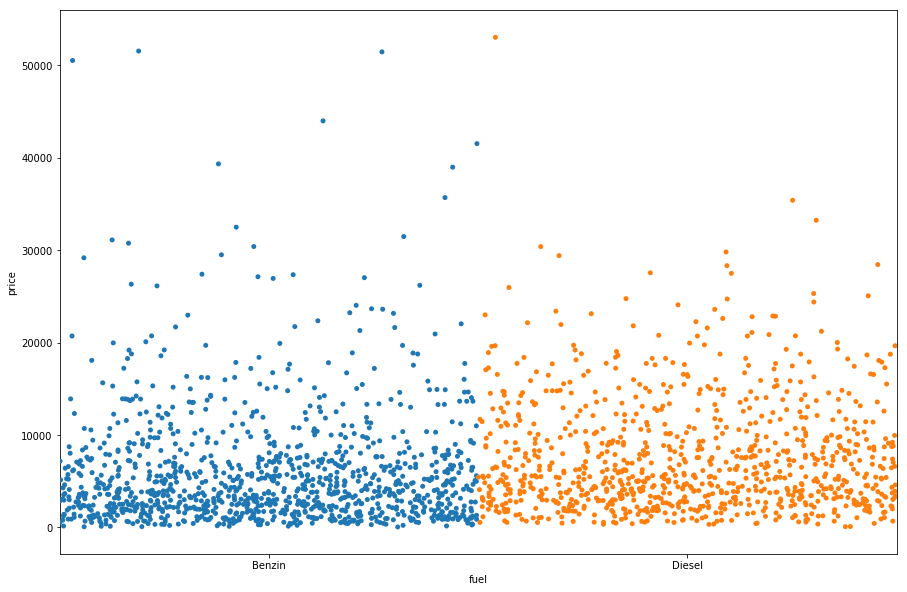

In [26]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = df, x='fuel', y='price', jitter=.5)
plt.show()

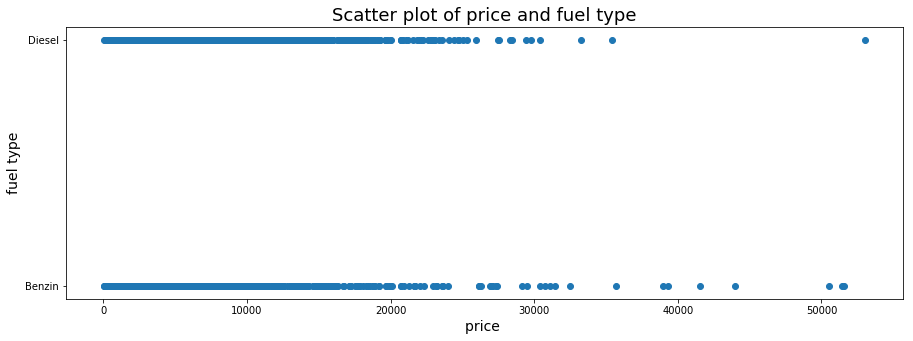

In [27]:
fuelDF=df.loc[~df['fuel'].isna()]
# here we set the figure size to 15x8
plt.figure(figsize=(15, 5))
# plot two values price per fuel type
plt.scatter(fuelDF.price,  fuelDF.fuel)
plt.xlabel("price ", fontsize=14)
plt.ylabel("fuel type", fontsize=14)
plt.title("Scatter plot of price and fuel type",fontsize=18)
plt.show()


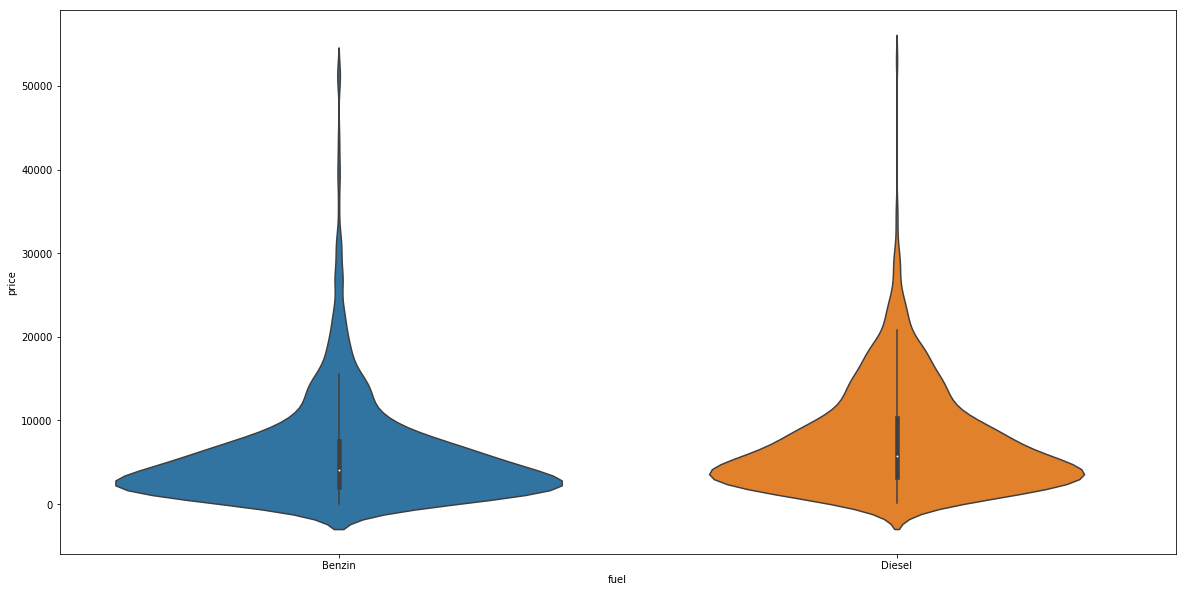

In [28]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = fuelDF, x=fuelDF.fuel, y='price')
plt.show()

### How price is distributed over the Gear Box?

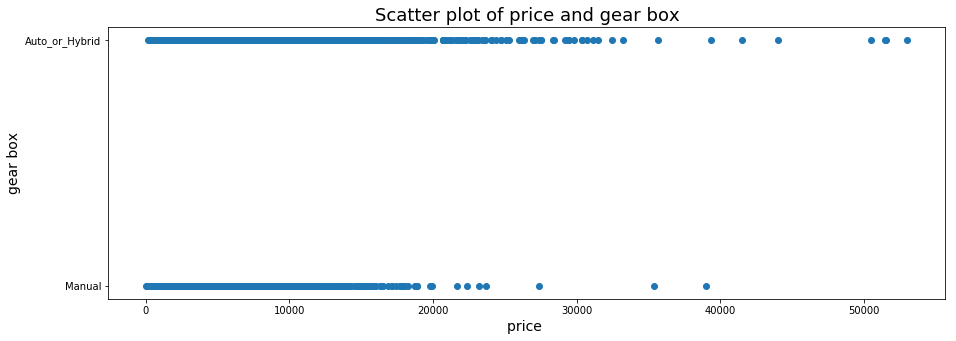

In [29]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 5))
# plot two values price per gear box
plt.scatter(df.price,  df.gear)
plt.xlabel("price ", fontsize=14)
plt.ylabel("gear box", fontsize=14)
plt.title("Scatter plot of price and gear box",fontsize=18)
plt.show()


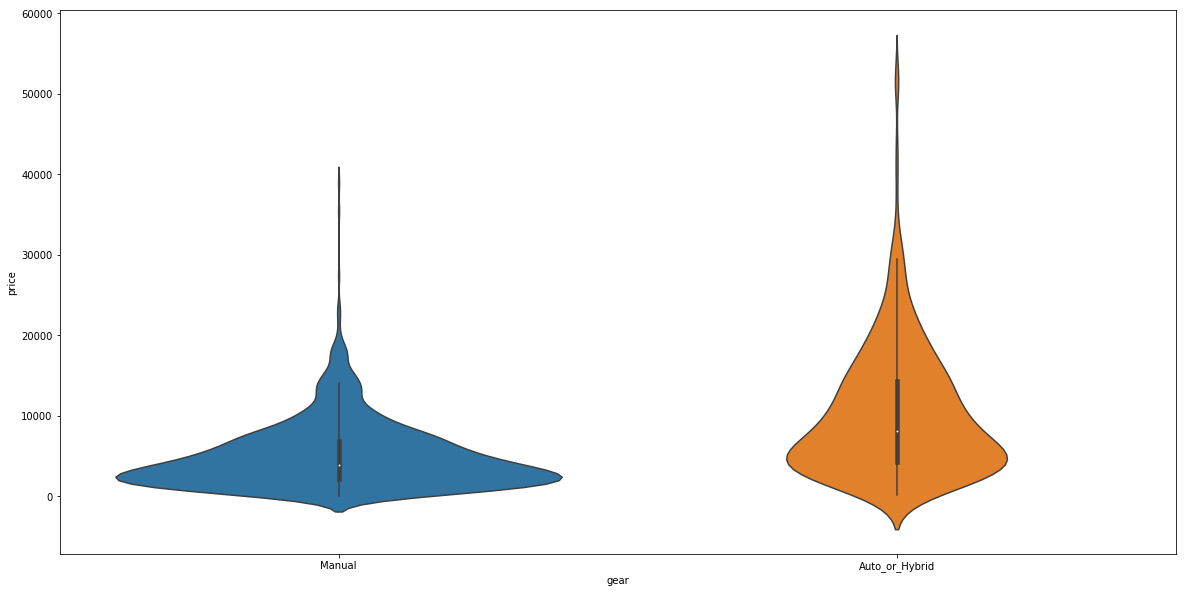

In [30]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = df, x=df.gear, y='price')
plt.show()

### How price is distributed over the AC?

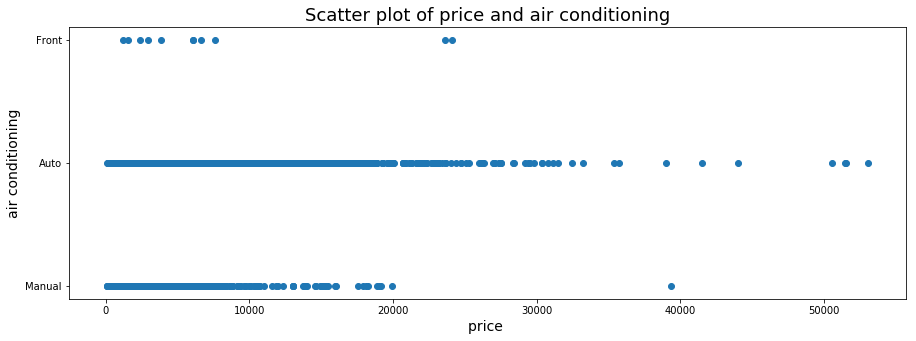

In [31]:
acDF=df.loc[~df['ac'].isna()]
# here we set the figure size to 15x8
plt.figure(figsize=(15, 5))
# plot two values price per ac
plt.scatter(acDF.price,  acDF.ac)
plt.xlabel("price ", fontsize=14)
plt.ylabel("air conditioning", fontsize=14)
plt.title("Scatter plot of price and air conditioning",fontsize=18)
plt.show()


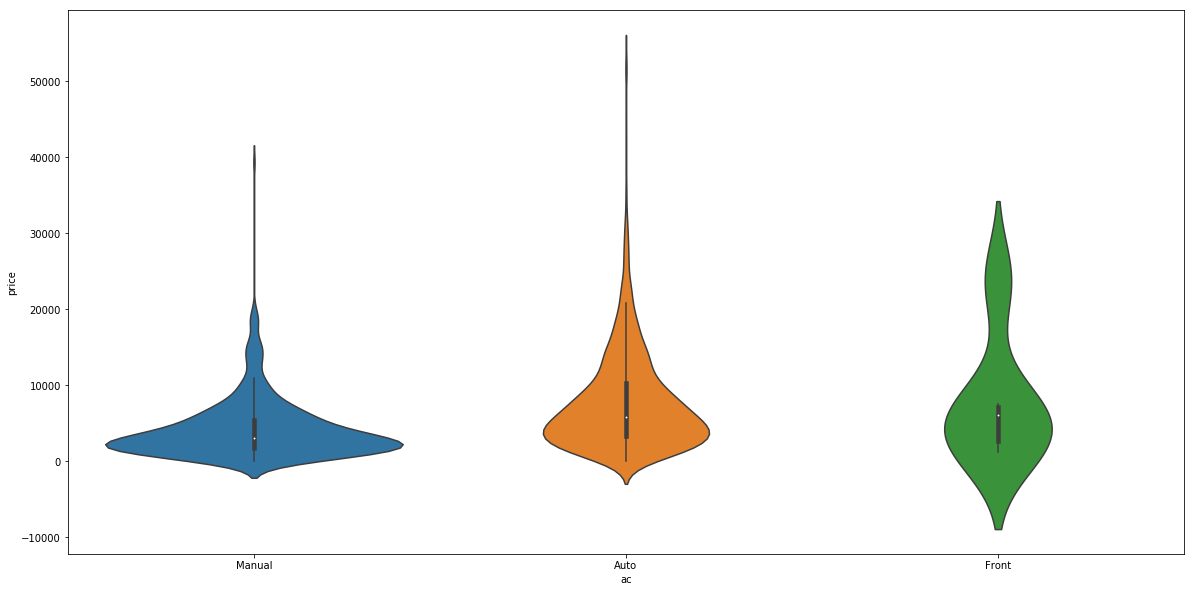

In [32]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = acDF, x=acDF.ac, y='price')
plt.show()

### How price is distributed over the gps?

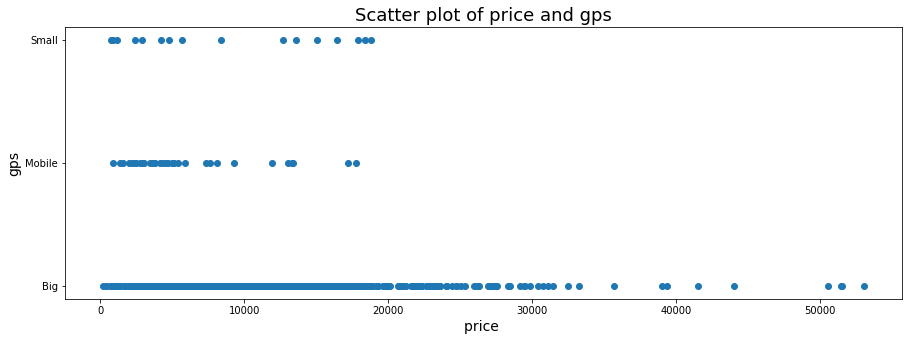

In [33]:
gpsDF=df.loc[~df['gps'].isna()]
# here we set the figure size to 15x8
plt.figure(figsize=(15, 5))
# plot two values price per year_model
plt.scatter(gpsDF.price,  gpsDF.gps)
plt.xlabel("price ", fontsize=14)
plt.ylabel("gps", fontsize=14)
plt.title("Scatter plot of price and gps",fontsize=18)
plt.show()


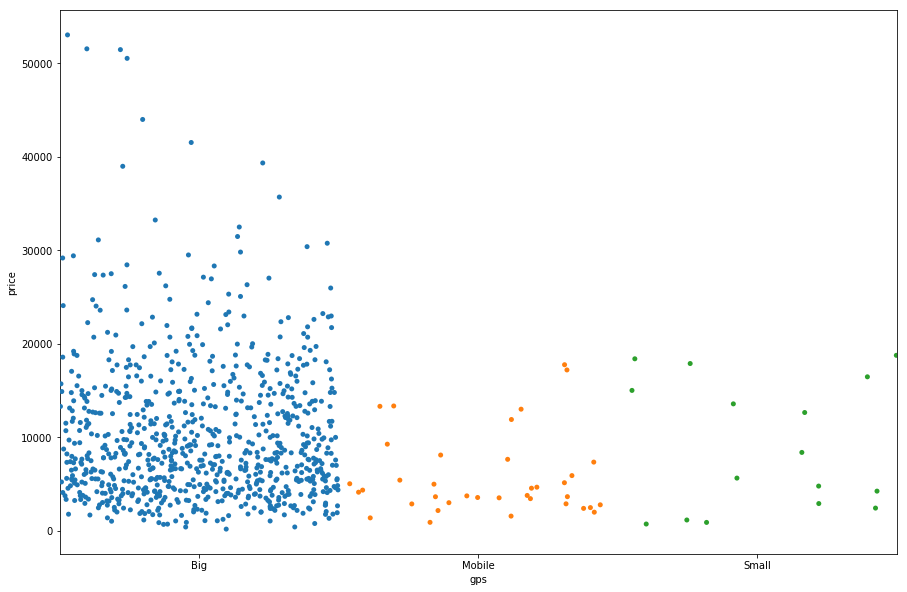

In [34]:
f, ax = plt.subplots(figsize=(15, 10))
sns.stripplot(data = gpsDF, x='gps', y='price', jitter=.5)
plt.show()

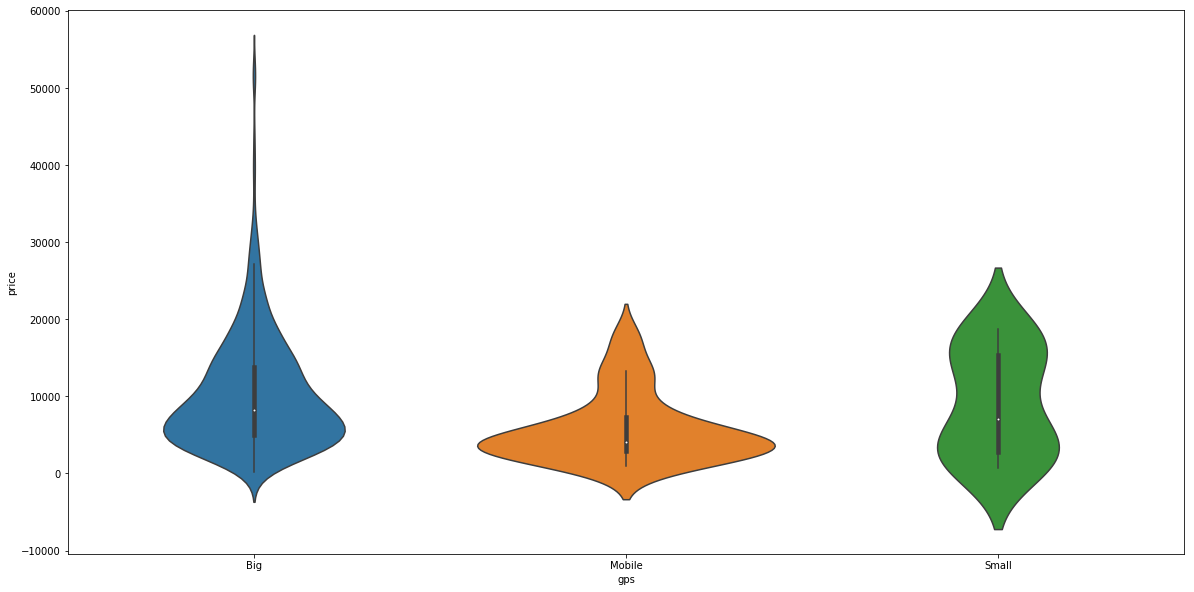

In [35]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = gpsDF, x=gpsDF.gps, y='price')
plt.show()

### How price is distributed over the color?

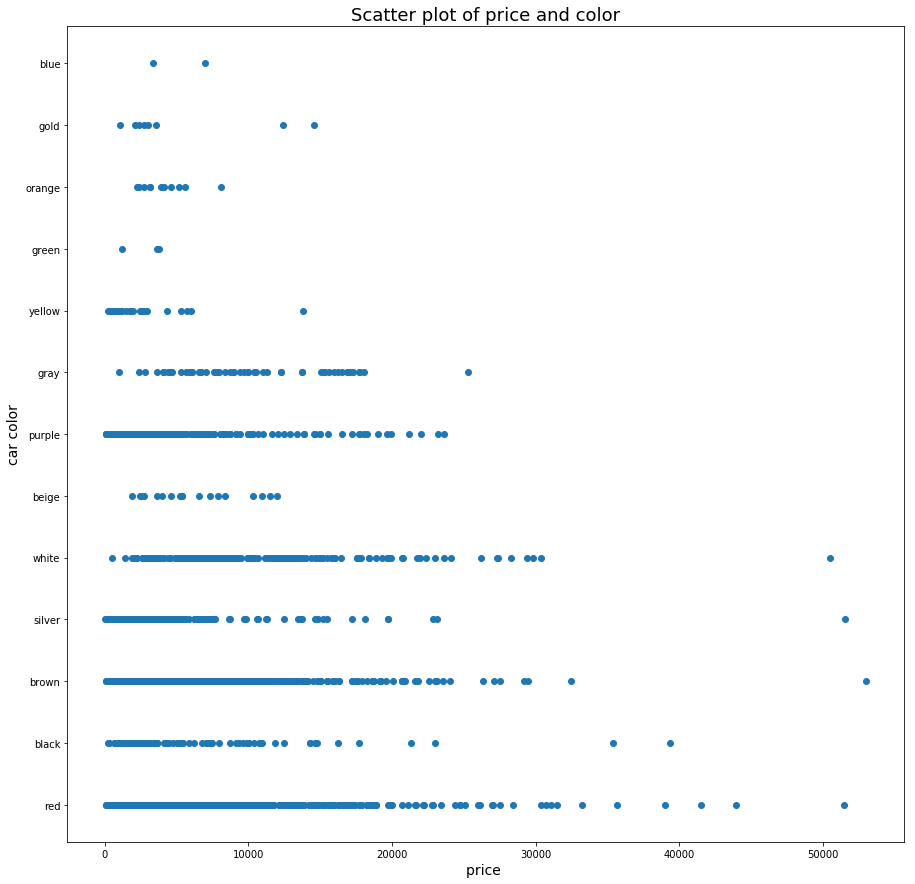

In [36]:
# here we set the figure size to 15x8
plt.figure(figsize=(15, 15))
# plot two values price per color
plt.scatter(df.price, df.color)
plt.xlabel("price ", fontsize=14)
plt.ylabel("car color", fontsize=14)
plt.title("Scatter plot of price and color",fontsize=18)
plt.show()


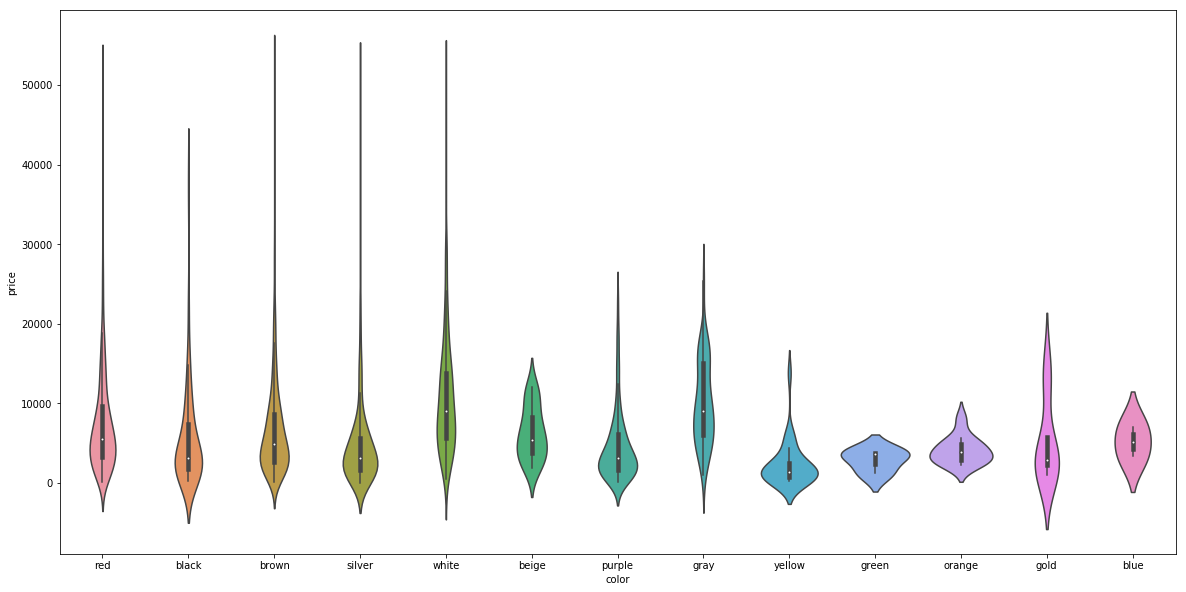

In [37]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data = df, x=df.color, y='price')
plt.show()

### How price is distributed over the Evaluation Date?

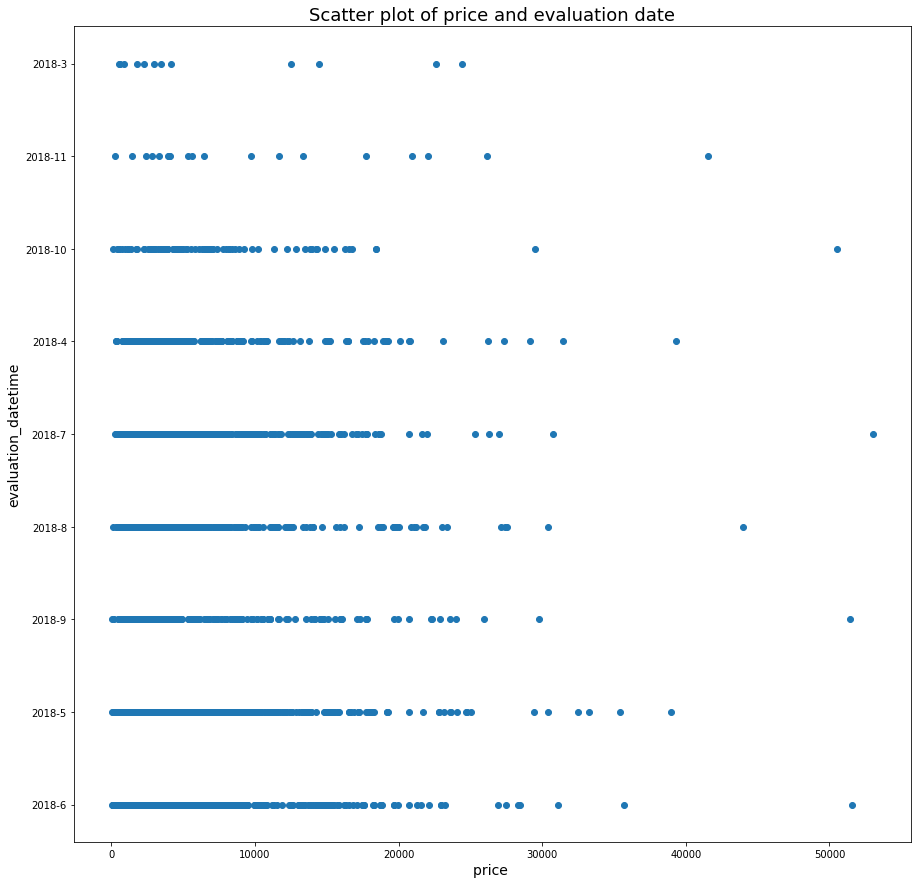

In [38]:

# here we set the figure size to 15x8
plt.figure(figsize=(15, 15))
# plot two values price per year_model
plt.scatter(df.price, df['evaluation_datetime'].dt.year.astype('str')+'-'+df['evaluation_datetime'].dt.month.astype('str'))
plt.xlabel("price ", fontsize=14)
plt.ylabel("evaluation_datetime", fontsize=14)
plt.title("Scatter plot of price and evaluation date",fontsize=18)
plt.show()


### Car prices distribution 

count     2092.000000
mean      6719.951243
std       6190.452275
min         50.000000
25%       2507.250000
50%       4932.500000
75%       8840.000000
max      53030.000000
Name: price, dtype: float64


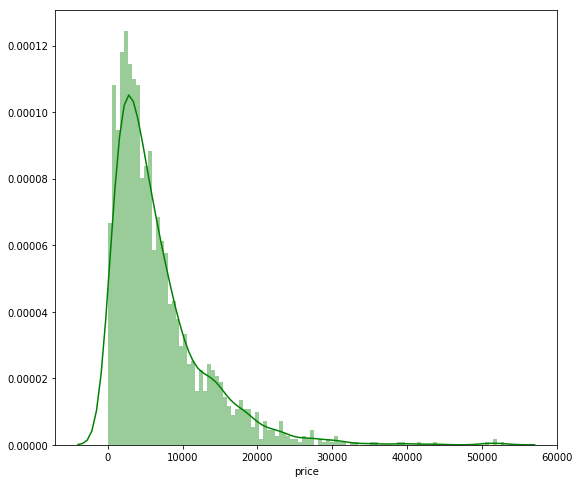

In [39]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [40]:
df_numeric = df.select_dtypes(include = ['float64', 'int64','datetime64[ns]'])

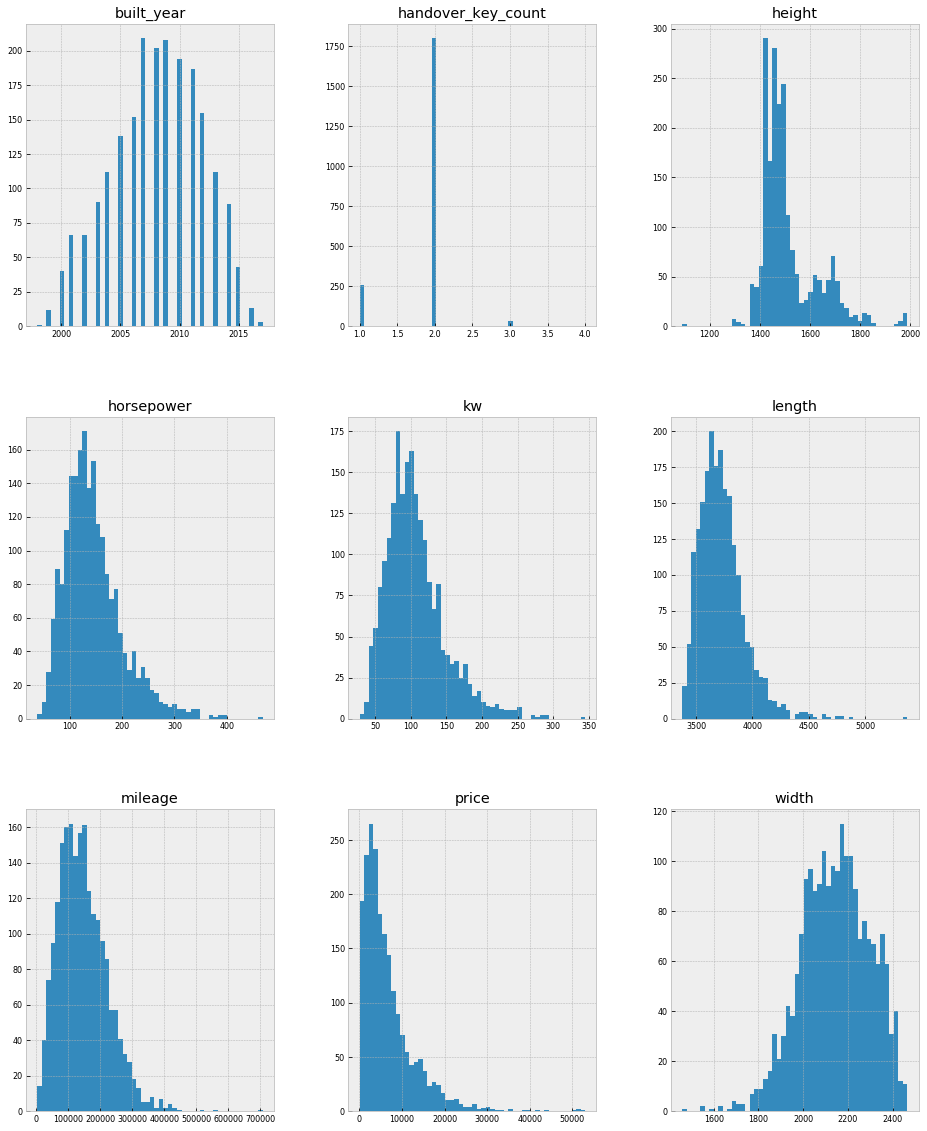

In [41]:
%matplotlib inline

plt.style.use('bmh')
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


# Question 1b
## Correlation matrix
### Numerical data distribution
#### The problem is to build a model that will predict used car prices with a high degree of predictive accuracy given the available data. Let's see what is the actual correlation between price and the other data points. We will look at this in 2 ways heatman for visualization and the correlation coefficient score.

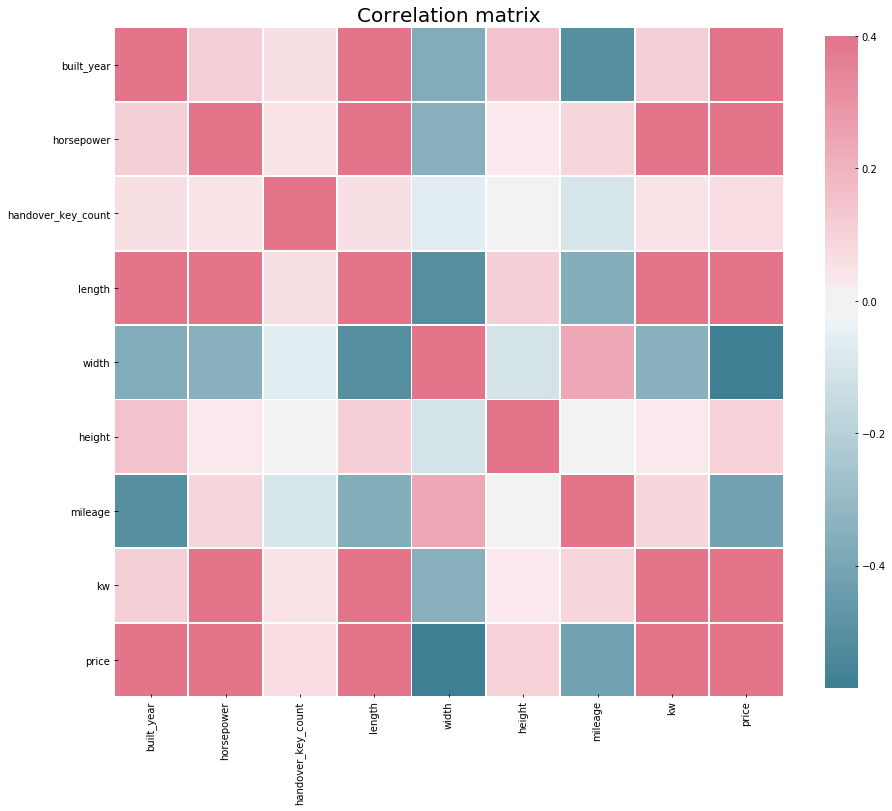

In [42]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 5, as_cmap=True)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Compute the correlation matrix
corr = df.corr()
#print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .8})
plt.title('Correlation matrix', 
          fontsize = 20)
plt.show()

In [43]:
df_numeric=df_numeric[["built_year","first_registration_date",
          "horsepower","handover_key_count","length",
          "width","height","mileage","kw","evaluation_datetime",
         "price"]]

In [44]:
df_numeric.head()

,built_year,first_registration_date,horsepower,handover_key_count,length,width,height,mileage,kw,evaluation_datetime,price
0,2006,2006-08-14,108.0,2,3594.0,2039.0,1501,306389.0,80.0,2018-06-29 16:22:31,1302
1,2009,2009-06-24,59.0,2,3736.0,2159.0,1462,183210.0,43.0,2018-06-01 13:30:40,3153
2,2002,2002-12-27,168.0,2,3452.0,2333.0,1486,203049.0,124.0,2018-05-26 15:14:39,1793
3,2003,2003-02-07,218.0,2,3495.0,2150.0,1445,344348.0,161.0,2018-06-23 16:48:08,3261
4,2004,2005-02-25,69.0,2,3586.0,2163.0,1451,242488.0,51.0,2018-09-02 15:13:29,805


In [45]:
df_numeric["first_registration_date"]=df_numeric["first_registration_date"].dt.year.astype('int')

In [46]:
df_numeric["evaluation_datetime"]=df_numeric["evaluation_datetime"].dt.year.astype('int')

In [47]:
df_num_corr = df_numeric.corr()['price'][:-1] ## we excluded the price

In [48]:
df_num_corr

built_year                 0.617851
first_registration_date    0.615990
horsepower                 0.574702
handover_key_count         0.069249
length                     0.837251
width                     -0.585578
height                     0.105862
mileage                   -0.419142
kw                         0.573702
evaluation_datetime             NaN
Name: price, dtype: float64

## feature selection 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2120
Data columns (total 18 columns):
manufacturer               2092 non-null object
main_type                  2092 non-null object
built_year                 2092 non-null int64
first_registration_date    2092 non-null datetime64[ns]
horsepower                 2089 non-null float64
handover_key_count         2092 non-null int64
length                     2087 non-null float64
width                      2088 non-null float64
height                     2092 non-null int64
mileage                    2086 non-null float64
kw                         2088 non-null float64
price                      2092 non-null int64
evaluation_datetime        2092 non-null datetime64[ns]
fuel                       2088 non-null object
gear                       2092 non-null object
ac                         2036 non-null object
gps                        873 non-null object
color                      2092 non-null object
dtypes: datet

In [50]:
X = df[['built_year', 'first_registration_date', 'horsepower', 
          'length', 'width','mileage','kw','manufacturer','main_type',
         'fuel','gear','ac','color']]
X.first_registration_date=X.first_registration_date.dt.year.astype('int')
X.head()

/media/emna/datapartition/classifiers/facesDB/celeb/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,built_year,first_registration_date,horsepower,length,width,mileage,kw,manufacturer,main_type,fuel,gear,ac,color
0,2006,2006,108.0,3594.0,2039.0,306389.0,80.0,Audi,1er,Benzin,Manual,Manual,red
1,2009,2009,59.0,3736.0,2159.0,183210.0,43.0,BMW,206,Benzin,Manual,Manual,black
2,2002,2002,168.0,3452.0,2333.0,203049.0,124.0,Audi,1er,Benzin,Manual,Auto,brown
3,2003,2003,218.0,3495.0,2150.0,344348.0,161.0,Citroen,207,Diesel,Auto_or_Hybrid,Auto,silver
4,2004,2005,69.0,3586.0,2163.0,242488.0,51.0,Dacia,307,Benzin,Manual,Manual,brown


In [51]:
X.dropna(inplace=True)

/media/emna/datapartition/classifiers/facesDB/celeb/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
Y = df.loc[:, df.columns != 'gps'].dropna().price
X = pd.get_dummies(data=X) #change qualitative data to bboolean data (quantitativ)

In [53]:
X.head()

,built_year,first_registration_date,horsepower,length,width,mileage,kw,manufacturer_Audi,manufacturer_BMW,manufacturer_Citroen,...,color_brown,color_gold,color_gray,color_green,color_orange,color_purple,color_red,color_silver,color_white,color_yellow
0,2006,2006,108.0,3594.0,2039.0,306389.0,80.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2009,2009,59.0,3736.0,2159.0,183210.0,43.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2002,2002,168.0,3452.0,2333.0,203049.0,124.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2003,2003,218.0,3495.0,2150.0,344348.0,161.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2004,2005,69.0,3586.0,2163.0,242488.0,51.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# split data to train test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)


### Lets apply some methods 
### I chose to apply 2 methods which are Linear regression and GradientBoostingRegressor (Random choice)
#### Simple Linear Regression

/media/emna/datapartition/classifiers/facesDB/celeb/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


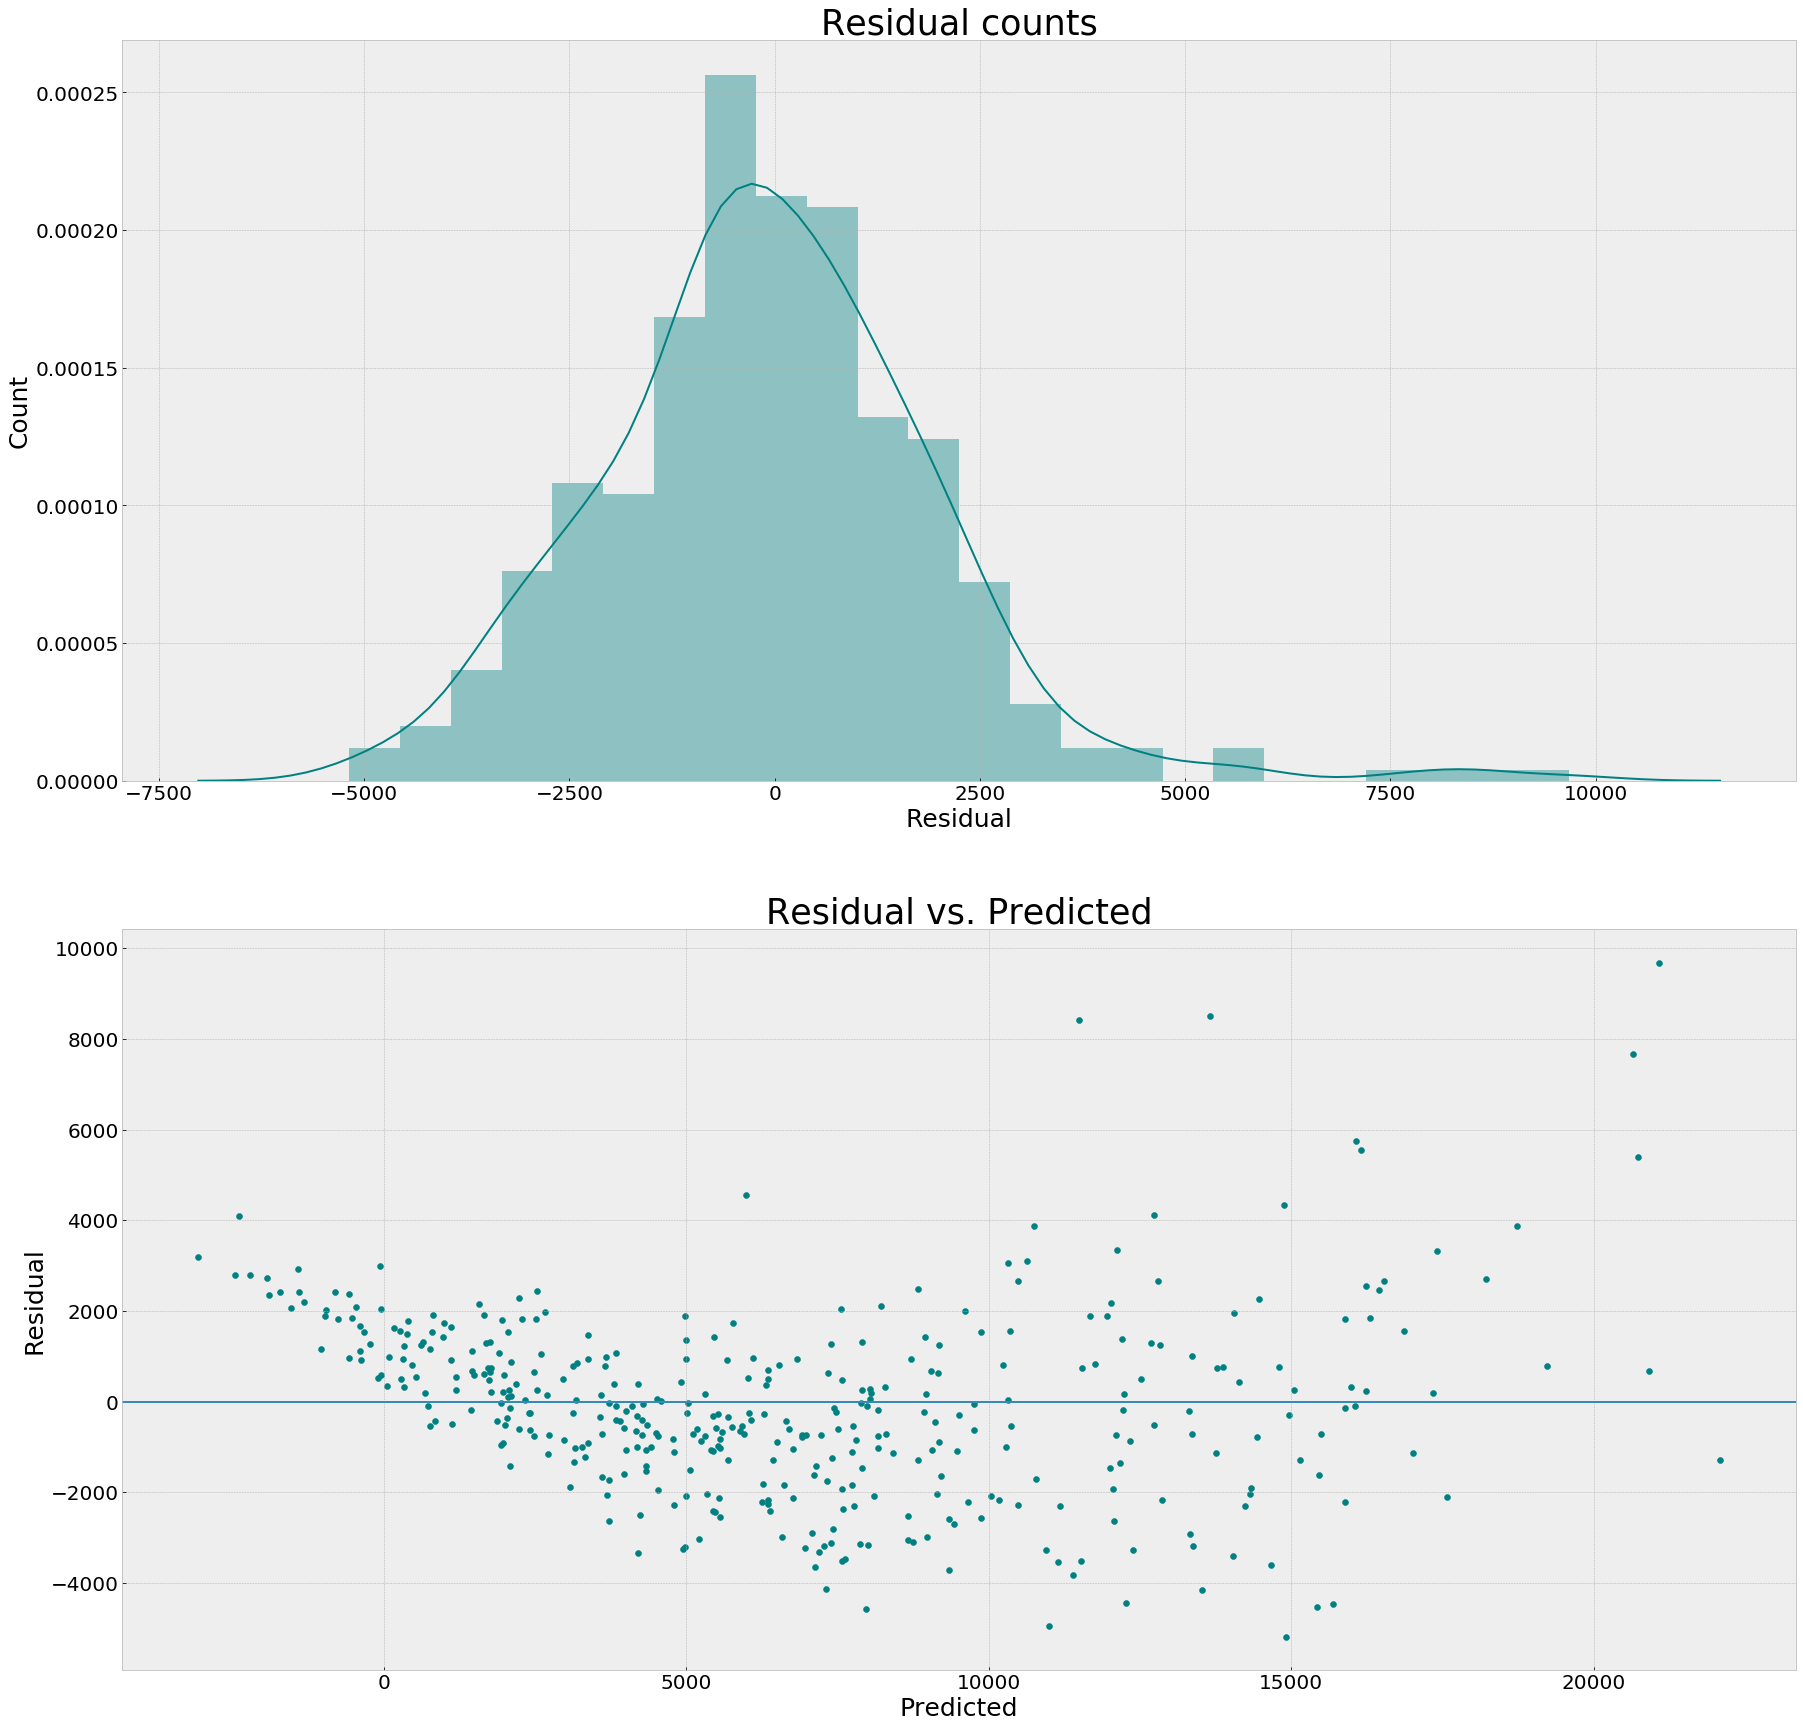

RMSE:  2035.023658681993

Mean Score:
0.8580433387472132
Variance score: 0.86


In [56]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(regr, X, Y, cv=12)

print('RMSE: ',rmse)
print('\nMean Score:')
print(scores.mean())
print('Variance score: %.2f' % r2_score(Y_test, predicted))


The root-mean-square error s a frequently used measure of the differences between values s a frequently used measure of the differences between values 

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


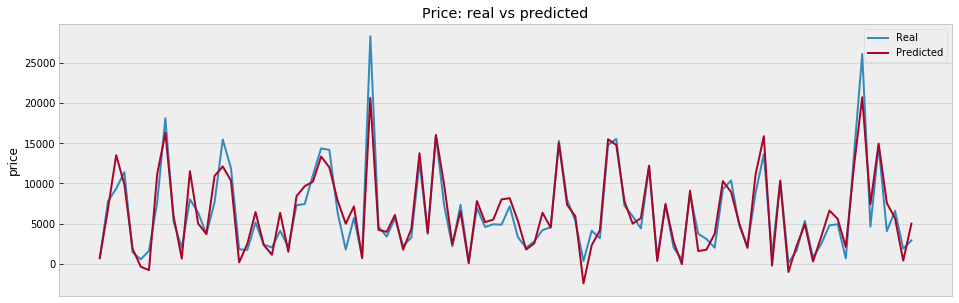

In [57]:
#let's see the how the predicted values are comparing to real values

A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

#### Gradient Boosting Regressor

/media/emna/datapartition/classifiers/facesDB/celeb/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


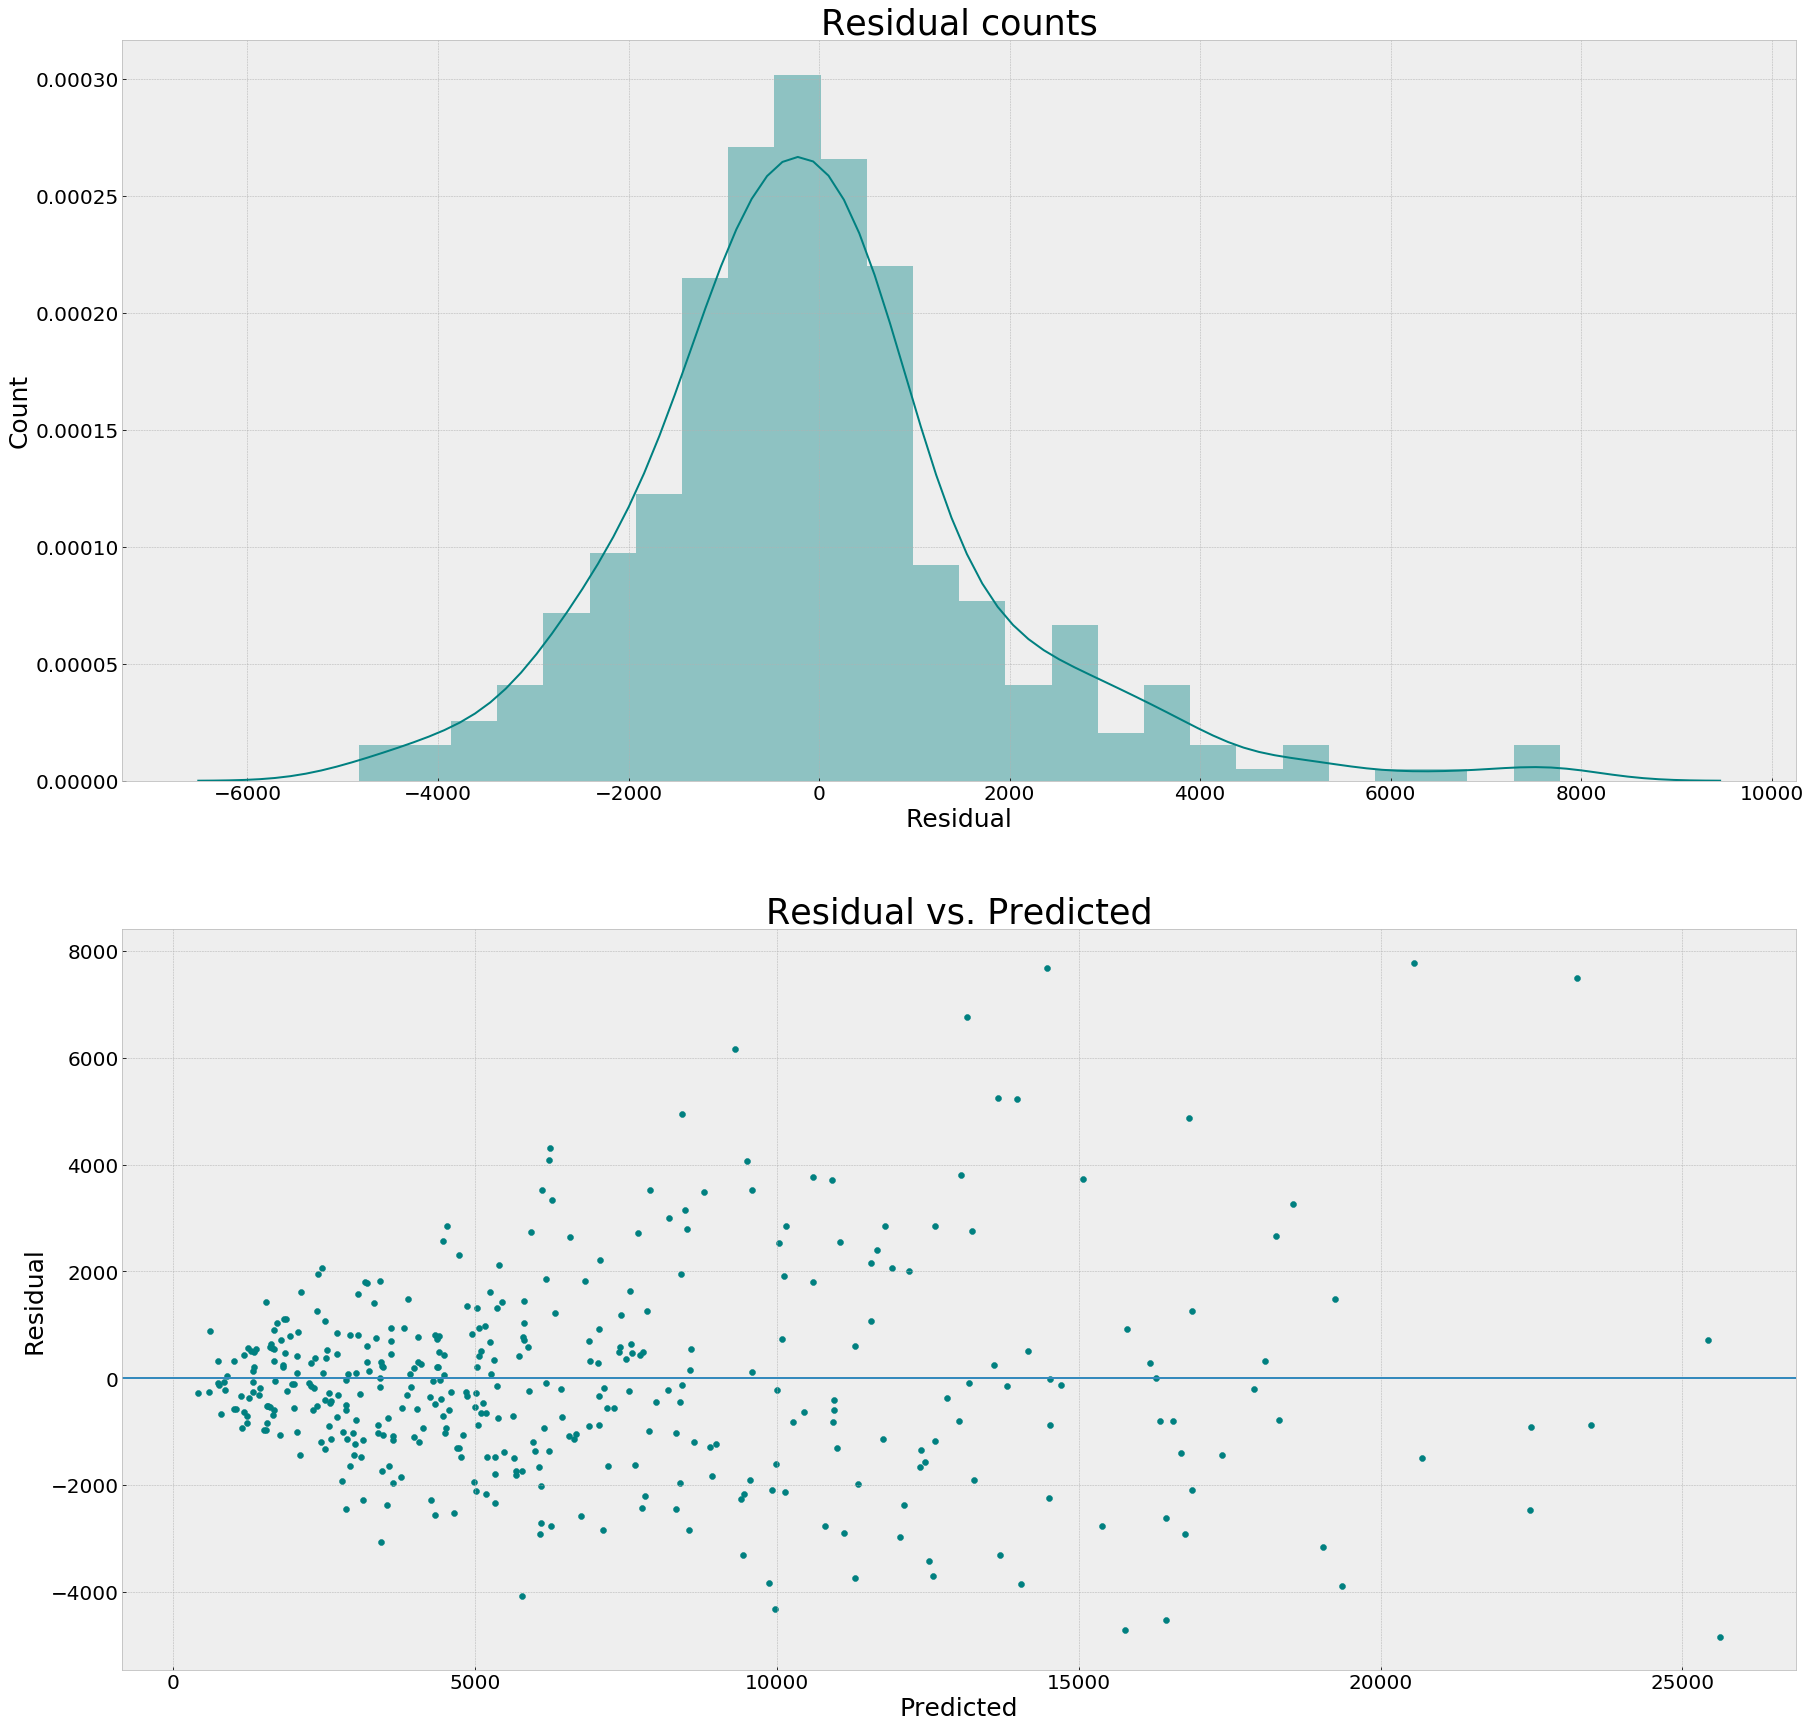


Mean Score:
0.887313428576931
RMSE:  1864.1241537697867
Variance score: 0.88


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gbr =GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)

print('\nMean Score:')
print(scores.mean())
print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


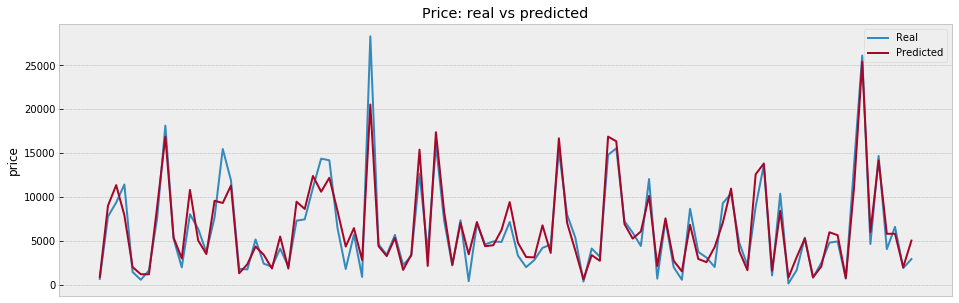

In [59]:
#let's see the how the predicted values are comparing to real values

A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

#### Models Benchmarking

So after trying 2 models to fit our data set, it’s time to draw a Benchmarking table that will summarize all the results we have got.

In [60]:
from IPython.display import HTML, display
import tabulate
table = [["Model","R² score","RMSE"],
         ["Linear Regression",0.86,2035.02],
         ["GradientBoostingRegressor",0.88,1862.42]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,R² score,RMSE
Linear Regression,0.86,2035.02
GradientBoostingRegressor,0.88,1862.42


### Parameter Tuning for the winner "GradientBoostingRegressor"

In [61]:
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor

def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
#Choose cross-validation generator 
#let's choose ShuffleSplit which randomly shuffles and selects Train and CV sets for each iteration. 
    cv = ShuffleSplit(n_splits=20, test_size=.25, random_state=0 ) 
#Apply the cross-validation iterator on the Training set using GridSearchCV. 
#This will run the classifier on the different train/cv splits using parameters specified 
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
#Also we're feeding multiple neighbors to the GridSearch to try out. 
#We'll now fit the training dataset to this classifier 
    classifier.fit(X_train, Y_train) 
#return the best estimator that was found by GridSearchCV
    return (cv, classifier.best_estimator_)

In [62]:
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1],# 0.05, 0.02, 0.01],
            'max_depth':[6],#4,6], 
            'min_samples_leaf':[3],#,5,9,17], 
            'max_features':[1.0],#,0.3]#,0.1] 
           } 
n_jobs=4 

In [63]:
cv,best_est=GradientBooster(param_grid, n_jobs)

/media/emna/datapartition/classifiers/facesDB/celeb/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


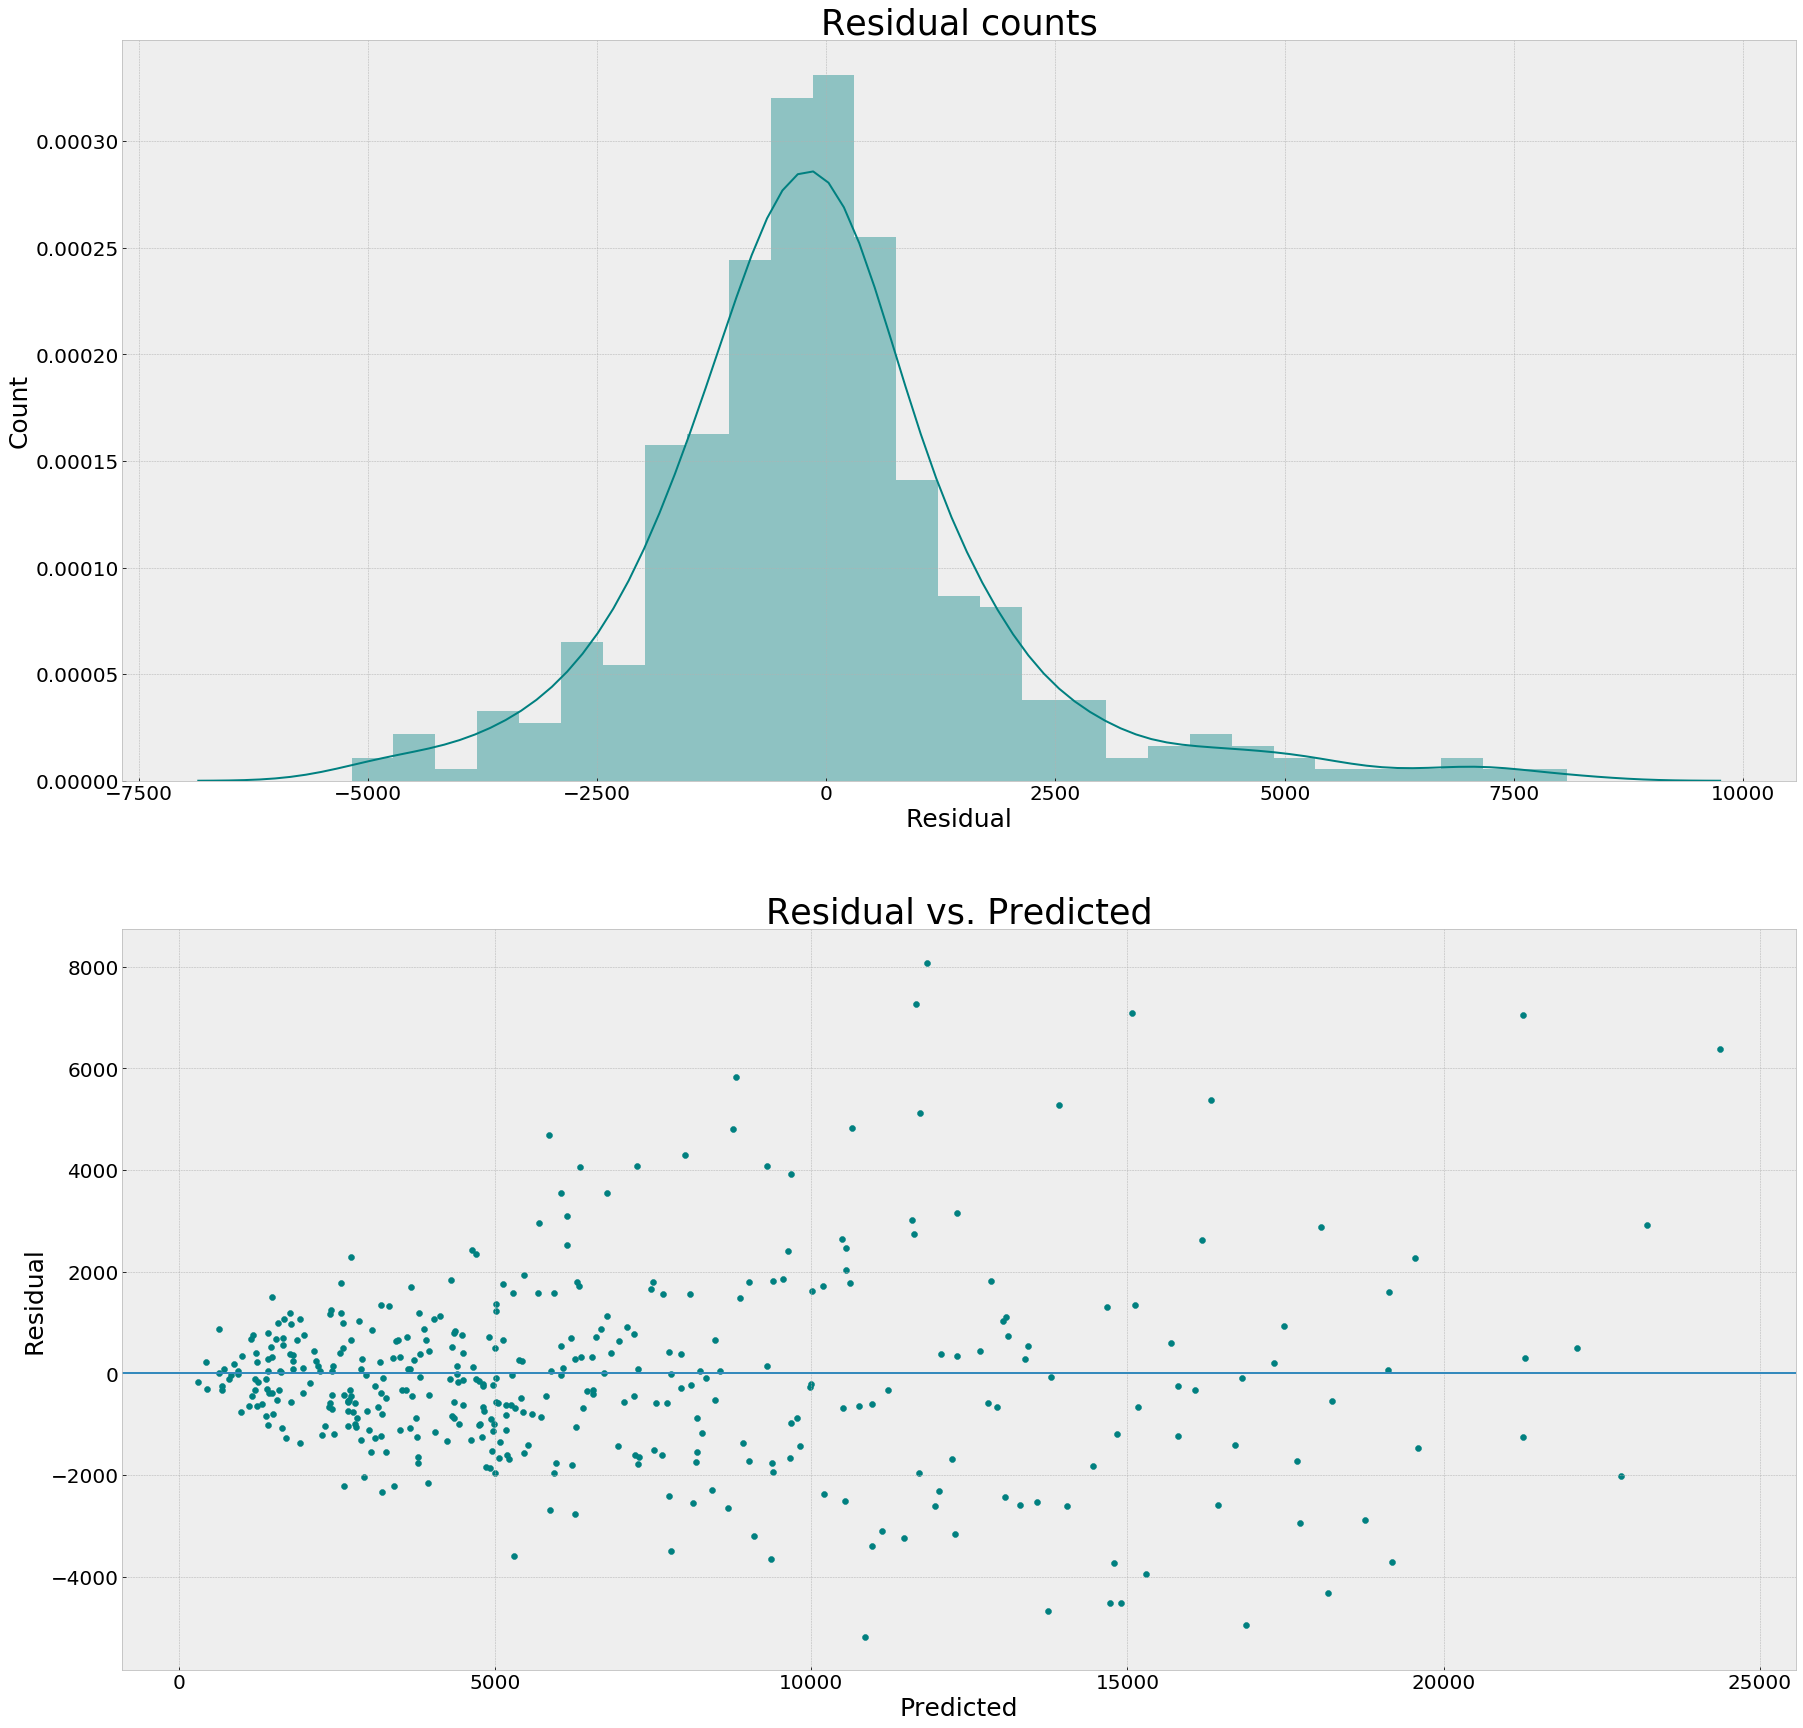

ACC: 0.8806

Cross Validation Scores:
[0.86323327 0.86962956 0.89365314 0.92311744 0.89439296 0.91380458
 0.87168282 0.87053928 0.92614341 0.91026505 0.88928545 0.91698136]

Mean Score:
0.895227360289045

RMSE:
1849.7705636850305
Variance score: 0.88


In [64]:


gbr = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth, 
                                learning_rate=best_est.learning_rate, 
                                min_samples_leaf=best_est.min_samples_leaf, 
                                max_features=best_est.max_features)
gbr.fit (X_train, Y_train)
predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
scores = cross_val_score(gbr, X, Y, cv=12)
acc=gbr.score(X_test, Y_test)

print('ACC: %.4f' % acc)
print('\nCross Validation Scores:')
print(scores)
print('\nMean Score:')
print(scores.mean())
print('\nRMSE:')
print(rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


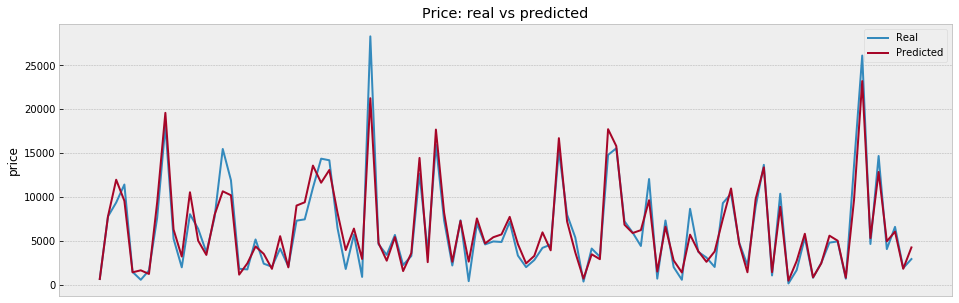

In [65]:
#let's see the how the predicted values are comparing to real values

A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

## QQ plot of Residual for selected model

In [66]:
import scipy.stats as stats

Text(0, 0.5, 'Ordered Values')

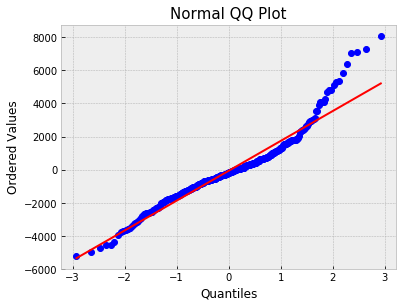

In [67]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Normal QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=12)

Text(0.5, 1.0, 'Feature importances - boosting regressor')

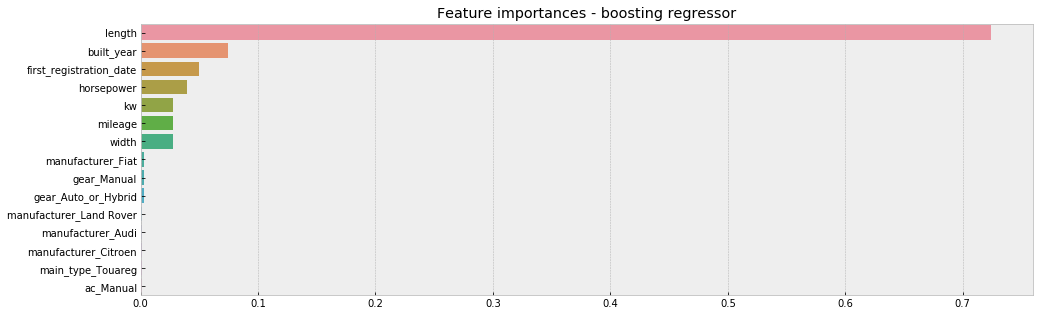

In [68]:
importances = gbr.feature_importances_
importances_by_trees=[tree[0].feature_importances_ for tree in gbr.estimators_]
std = np.std(importances_by_trees,axis=0)
indices = np.argsort(importances)[::-1]


sns.barplot(importances[indices][:15],X_test.columns[indices[:15]].values)
plt.title("Feature importances - boosting regressor")

## Let's make a prediction

In [69]:
X.head()

,built_year,first_registration_date,horsepower,length,width,mileage,kw,manufacturer_Audi,manufacturer_BMW,manufacturer_Citroen,...,color_brown,color_gold,color_gray,color_green,color_orange,color_purple,color_red,color_silver,color_white,color_yellow
0,2006,2006,108.0,3594.0,2039.0,306389.0,80.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2009,2009,59.0,3736.0,2159.0,183210.0,43.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2002,2002,168.0,3452.0,2333.0,203049.0,124.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2003,2003,218.0,3495.0,2150.0,344348.0,161.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2004,2005,69.0,3586.0,2163.0,242488.0,51.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
# user_input = [2010, 124999.5, 6, 'Diesel', 'BMW']


user_input = {'built_year':2016, 'first_registration_date':2016, 
              'horsepower':200, 'length':3500, 'width':2150,
                'mileage':203049,'kw':120, 'manufacturer':"Audi",
             'main_type':"1er",'fuel':"Benzin",'gear':"Auto_or_Hybrid",'ac':"Manual",'color':"brown"}
def input_to_one_hot(data):
    # initialize the target vector with zero values
    enc_input = np.zeros(132)
    # set the numerical input as they are
    enc_input[0] = data['built_year']
    enc_input[1] = data['first_registration_date']
    enc_input[2] = data['horsepower']
    enc_input[3] = data['length']
    enc_input[4] = data['width']
    enc_input[5] = data['mileage']
    enc_input[6] = data['kw'] 

      
    
    

   
    ##################### manufacturer #########################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'manufacturer_'+data['manufacturer']
    # search for the index in columns name list 
    manufacturer_column_index = X.columns.tolist().index(redefinded_user_input)

    # fullfill the found index with 1
    enc_input[manufacturer_column_index] = 1
    ##################### Vehicule type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'main_type_'+data['main_type']
    # search for the index in columns name list 
    carType_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[carType_column_index] = 1
    
    ##################### Fuel type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'fuel_'+data['fuel']
    # search for the index in columns name list 
    fuel_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[fuel_column_index] = 1
    
    ##################### gear box type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'gear_'+data['gear']
    # search for the index in columns name list 
    gear_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[gear_column_index] = 1

    ##################### ac  type ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'ac_'+data['ac']
    # search for the index in columns name list 
    ac_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[ac_column_index] = 1
    
    
    ##################### car color ####################
    # redefine the the user inout to match the column name
    redefinded_user_input = 'color_'+data['color']
    # search for the index in columns name list 
    color_column_index = X.columns.tolist().index(redefinded_user_input)
    # fullfill the found index with 1
    enc_input[color_column_index] = 1
    return enc_input

In [71]:
a = input_to_one_hot(user_input)

In [72]:
price_pred = gbr.predict([a])


In [73]:
price_pred[0]

8992.79260757129